# Heart Disease Prediction - Machine Learning Project

## Framingham Heart Disease Dataset Analysis

This notebook contains a complete machine learning pipeline for predicting heart disease risk using the Framingham dataset.


## Step 1: Import Required Libraries


In [2]:
# Import pandas - used for data manipulation and analysis with DataFrames
import pandas as pd

# Import numpy - used for numerical operations and arrays
import numpy as np

# Import matplotlib - used for creating basic plots and charts
import matplotlib.pyplot as plt

# Import seaborn - used for advanced statistical visualizations
import seaborn as sns

# Import scipy stats - used for statistical tests and analysis
from scipy import stats

# Import train_test_split - splits data into training and testing sets
# Import cross_val_score - performs cross-validation for model evaluation
# Import GridSearchCV - finds best hyperparameters for models
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Import StandardScaler - scales features to have mean=0 and std=1
# Import LabelEncoder - converts categorical labels to numerical values
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import classification_report - provides precision, recall, f1-score metrics
# Import confusion_matrix - shows true vs predicted classifications
# Import accuracy_score - calculates prediction accuracy
# Import roc_auc_score - calculates area under ROC curve (model performance metric)
# Import roc_curve - generates data for plotting ROC curves
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Import warnings module to control warning messages
import warnings
# Ignore all warning messages to keep output clean
warnings.filterwarnings('ignore')

# Set pandas to display all columns (no truncation)
pd.set_option('display.max_columns', None)
# Set pandas to display up to 100 rows at a time
pd.set_option('display.max_rows', 100)
# Set matplotlib style to seaborn darkgrid for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')

# Print confirmation message that all libraries loaded successfully
print("Libraries imported successfully!")


Libraries imported successfully!


## Step 2: Load the Dataset


In [3]:
# Define the file path to the CSV file (r"" means raw string to handle backslashes)
data_path = r"C:\Users\syeda\Downloads\framingham.csv"

# Read the CSV file into a pandas DataFrame called 'df'
df = pd.read_csv(data_path)

# Print confirmation message
print("Dataset loaded successfully!")

# Print the shape (rows, columns) as a tuple
print(f"Dataset shape: {df.shape}")

# Print the number of rows (patients) in the dataset
print(f"Number of rows: {df.shape[0]}")

# Print the number of columns (features + target) in the dataset
print(f"Number of columns: {df.shape[1]}")


Dataset loaded successfully!
Dataset shape: (4240, 16)
Number of rows: 4240
Number of columns: 16


## Step 3: Initial Data Exploration


In [4]:
# Print a message to introduce the data preview
print("First 5 rows of the dataset:")

# Display the first 5 rows of the DataFrame to understand the data structure
# head() function returns the first n rows (default is 5)
df.head()


First 5 rows of the dataset:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Dataset Information


In [5]:
# Print header message
print("Dataset Information:")

# Print a separator line (80 equal signs)
print("=" * 80)

# Display detailed info: column names, non-null counts, data types, memory usage
# This helps identify missing values and data types
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 5

### Column Names and Data Types


In [6]:
# Print header message
print("Column Names and Data Types:")
# Print separator line
print("=" * 80)

# Loop through each column in the DataFrame
for col in df.columns:
    # Print column name (padded to 30 chars), data type (padded to 15 chars), and unique value count
    # nunique() counts the number of unique values in each column
    print(f"{col:30s} : {str(df[col].dtype):15s} (Unique values: {df[col].nunique()})")


Column Names and Data Types:
male                           : int64           (Unique values: 2)
age                            : int64           (Unique values: 39)
education                      : float64         (Unique values: 4)
currentSmoker                  : int64           (Unique values: 2)
cigsPerDay                     : float64         (Unique values: 33)
BPMeds                         : float64         (Unique values: 2)
prevalentStroke                : int64           (Unique values: 2)
prevalentHyp                   : int64           (Unique values: 2)
diabetes                       : int64           (Unique values: 2)
totChol                        : float64         (Unique values: 248)
sysBP                          : float64         (Unique values: 234)
diaBP                          : float64         (Unique values: 146)
BMI                            : float64         (Unique values: 1364)
heartRate                      : float64         (Unique values: 73)
glucose

### Statistical Summary


In [7]:
# Print header message
print("Statistical Summary of Numerical Features:")
# Print separator line
print("=" * 80)

# describe() generates statistics (count, mean, std, min, quartiles, max) for numerical columns
# .T transposes the result to show features as rows for better readability
df.describe().T


Statistical Summary of Numerical Features:


,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


## Step 4: Missing Values Analysis


In [8]:
# Print header message
print("Missing Values Analysis:")
# Print separator line
print("=" * 80)

# Create a DataFrame to store missing value information
missing_data = pd.DataFrame({
    # Column names from the original dataset
    'Column': df.columns,
    # Count of missing values per column using isnull().sum()
    'Missing_Count': df.isnull().sum(),
    # Calculate percentage of missing values: (missing / total rows) * 100
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})

# Filter to show only columns with missing values (Missing_Count > 0)
# Then sort by Missing_Percentage in descending order (highest missing % first)
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(by='Missing_Percentage', ascending=False)

# Check if there are any columns with missing values
if len(missing_data) > 0:
    # Print the missing data table without row indices
    print(missing_data.to_string(index=False))
else:
    # If no missing values, print confirmation message
    print("No missing values found in the dataset!")


Missing Values Analysis:
    Column  Missing_Count  Missing_Percentage
   glucose            388            9.150943
 education            105            2.476415
    BPMeds             53            1.250000
   totChol             50            1.179245
cigsPerDay             29            0.683962
       BMI             19            0.448113
 heartRate              1            0.023585


### Visualize Missing Values


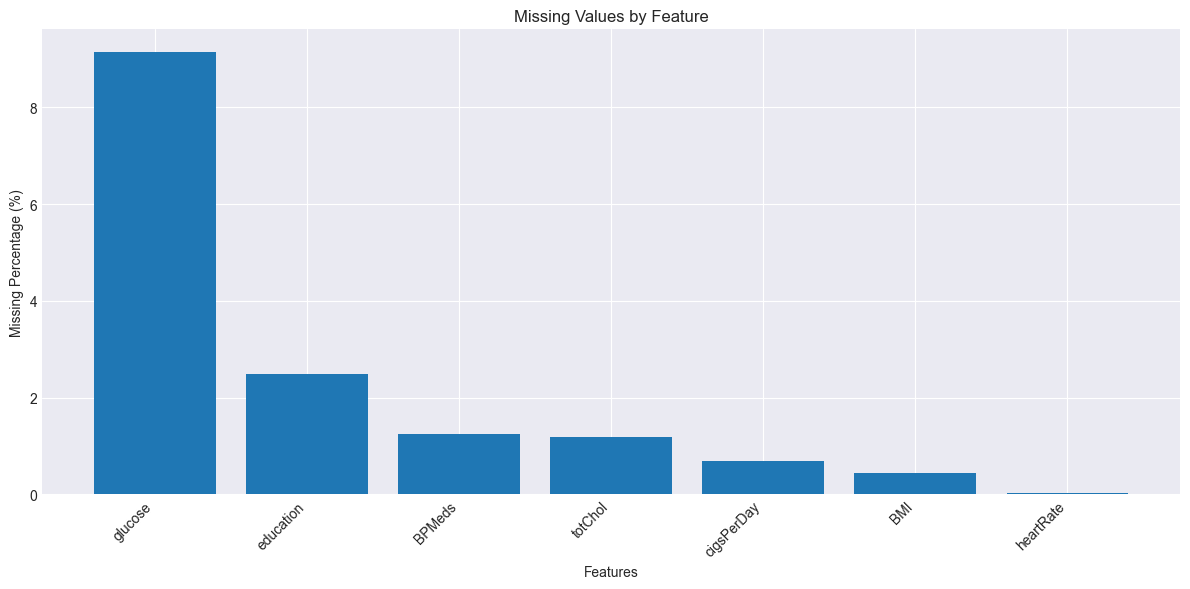

In [9]:
# Create a new figure with size 12 inches wide by 6 inches tall
plt.figure(figsize=(12, 6))

# Calculate percentage of missing values for each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Keep only columns with missing values (>0) and sort in descending order
missing_percentages = missing_percentages[missing_percentages > 0].sort_values(ascending=False)

# Check if there are any missing values to visualize
if len(missing_percentages) > 0:
    # Create a bar chart: x-axis = indices, y-axis = missing percentages
    plt.bar(range(len(missing_percentages)), missing_percentages.values)
    
    # Set x-axis labels to column names, rotated 45 degrees, aligned right
    plt.xticks(range(len(missing_percentages)), missing_percentages.index, rotation=45, ha='right')
    
    # Set x-axis label
    plt.xlabel('Features')
    
    # Set y-axis label
    plt.ylabel('Missing Percentage (%)')
    
    # Set chart title
    plt.title('Missing Values by Feature')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Display the plot
    plt.show()
else:
    # If no missing values exist, print message instead
    print("No missing values to visualize.")


## Step 5: Identify Target Variable and Define Problem


In [10]:
# Note: For Framingham dataset, the target is 'TenYearCHD'
# TenYearCHD = 10-year risk of coronary heart disease
# This is a binary classification problem: 1 = has CHD risk, 0 = no CHD risk

# Print header
print("Identifying Target Variable:")
print("=" * 80)

# Check if 'TenYearCHD' column exists in the DataFrame
if 'TenYearCHD' in df.columns:
    # If found, store it as our target column
    target_column = 'TenYearCHD'
    print(f"Target Variable Found: {target_column}")
    
# Otherwise, check for alternative name 'heartDisease'
elif 'heartDisease' in df.columns:
    target_column = 'heartDisease'
    print(f"Target Variable Found: {target_column}")
    
# If neither exists, show all available columns
else:
    print("Possible target variable not found. Available columns:")
    print(df.columns.tolist())
    target_column = None

# If target column was successfully identified
if target_column:
    # Print the type of machine learning problem
    print(f"\nProblem Type: Binary Classification")
    
    # Show unique values in target (should be 0 and 1)
    print(f"Target Values: {df[target_column].unique()}")
    
    # Show count of each class (how many 0s and 1s)
    print(f"\nTarget Distribution:")
    print(df[target_column].value_counts())
    
    # Show percentage distribution of each class
    print(f"\nTarget Percentage:")
    print(df[target_column].value_counts(normalize=True) * 100)


Identifying Target Variable:
Target Variable Found: TenYearCHD

Problem Type: Binary Classification
Target Values: [0 1]

Target Distribution:
TenYearCHD
0    3596
1     644
Name: count, dtype: int64

Target Percentage:
TenYearCHD
0    84.811321
1    15.188679
Name: proportion, dtype: float64


### Visualize Target Variable Distribution (Class Imbalance)


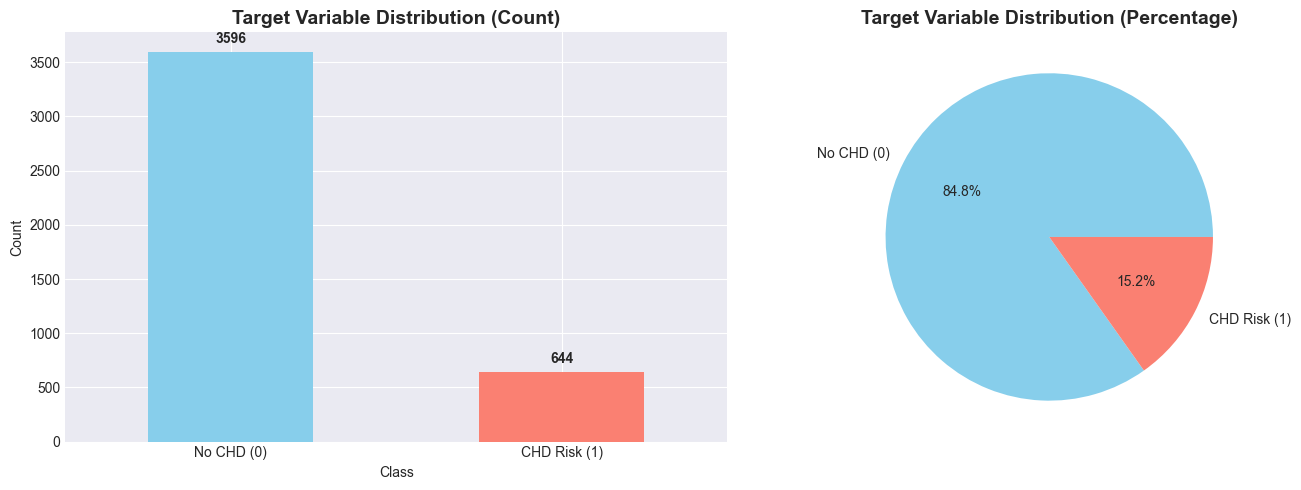


Class Imbalance Ratio: 5.58:1
   -> Significant class imbalance detected. Consider using techniques like:
      - SMOTE (Synthetic Minority Over-sampling)
      - Class weights in models
      - Stratified sampling


In [11]:
# Check if target column was found
if target_column:
    # Create a figure with 1 row and 2 columns of subplots, size 14x5 inches
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # === LEFT PLOT: Bar Chart ===
    # Create a bar plot showing count of each class (0 and 1)
    df[target_column].value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
    
    # Set title for the bar chart
    axes[0].set_title('Target Variable Distribution (Count)', fontsize=14, fontweight='bold')
    
    # Set x-axis label
    axes[0].set_xlabel('Class')
    
    # Set y-axis label
    axes[0].set_ylabel('Count')
    
    # Set custom labels for x-axis (0 = No CHD, 1 = CHD Risk)
    axes[0].set_xticklabels(['No CHD (0)', 'CHD Risk (1)'], rotation=0)
    
    # Add count values on top of each bar
    for i, v in enumerate(df[target_column].value_counts().values):
        # Place text at position (i, v+50) showing the count value
        axes[0].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
    
    # === RIGHT PLOT: Pie Chart ===
    # Create a pie chart showing percentage distribution
    df[target_column].value_counts().plot(kind='pie', ax=axes[1], 
                                           autopct='%1.1f%%',  # Show percentage with 1 decimal
                                           labels=['No CHD (0)', 'CHD Risk (1)'],
                                           colors=['skyblue', 'salmon'])
    
    # Set title for the pie chart
    axes[1].set_title('Target Variable Distribution (Percentage)', fontsize=14, fontweight='bold')
    
    # Remove y-axis label for pie chart (not needed)
    axes[1].set_ylabel('')
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Display both plots
    plt.show()
    
    # === Calculate Class Imbalance ===
    # Get count of each class
    class_counts = df[target_column].value_counts()
    
    # Calculate imbalance ratio: majority class / minority class
    imbalance_ratio = class_counts.max() / class_counts.min()
    
    # Display the imbalance ratio
    print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1")
    
    # If ratio > 3, suggest techniques to handle imbalance
    if imbalance_ratio > 3:
        print("   -> Significant class imbalance detected. Consider using techniques like:")
        print("      - SMOTE (Synthetic Minority Over-sampling)")
        print("      - Class weights in models")
        print("      - Stratified sampling")


## Step 6: Identify Features (Predictor Variables)


In [12]:
# Check if target column was identified
if target_column:
    # Create a list of all columns except the target variable
    # These are our features (predictors) for the model
    feature_columns = [col for col in df.columns if col != target_column]
    
    # Print total number of features
    print(f"Total Features: {len(feature_columns)}")
    print("=" * 80)
    
    # === Categorize features by data type ===
    # Select only numerical features (int64 and float64 types)
    numerical_features = df[feature_columns].select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Select only categorical features (object/string type)
    categorical_features = df[feature_columns].select_dtypes(include=['object']).columns.tolist()
    
    # Display all numerical features with numbering
    print(f"\nNumerical Features ({len(numerical_features)}):")
    for i, feat in enumerate(numerical_features, 1):
        print(f"   {i}. {feat}")
    
    # Display categorical features if any exist
    if len(categorical_features) > 0:
        print(f"\nCategorical Features ({len(categorical_features)}):")
        for i, feat in enumerate(categorical_features, 1):
            print(f"   {i}. {feat}")
    else:
        print(f"\nCategorical Features: None")
    
    # Print informational section about typical heart disease risk factors
    print("\n" + "=" * 80)
    print("Common Heart Disease Risk Factors Typically Include:")
    print("  - Demographic: age, sex")
    print("  - Lifestyle: smoking status, physical activity")
    print("  - Clinical: blood pressure (systolic/diastolic), cholesterol, glucose")
    print("  - Medical history: diabetes, hypertension medication")


Total Features: 15

Numerical Features (15):
   1. male
   2. age
   3. education
   4. currentSmoker
   5. cigsPerDay
   6. BPMeds
   7. prevalentStroke
   8. prevalentHyp
   9. diabetes
   10. totChol
   11. sysBP
   12. diaBP
   13. BMI
   14. heartRate
   15. glucose

Categorical Features: None

Common Heart Disease Risk Factors Typically Include:
  - Demographic: age, sex
  - Lifestyle: smoking status, physical activity
  - Clinical: blood pressure (systolic/diastolic), cholesterol, glucose
  - Medical history: diabetes, hypertension medication


## Step 7: Problem Definition Summary


In [13]:
# === Create a formatted summary box ===
# Print top border of the box
print("╔" + "=" * 78 + "╗")
# Print title centered in the box
print("║" + " " * 20 + "PROBLEM DEFINITION SUMMARY" + " " * 32 + "║")
# Print separator line
print("╠" + "=" * 78 + "╣")

# Check if target column exists
if target_column:
    # Display the objective
    print(f"║ OBJECTIVE:                                                                   ║")
    print(f"║    Predict 10-year risk of Coronary Heart Disease (CHD)                    ║")
    print(f"║                                                                              ║")
    
    # Display the problem type
    print(f"║ PROBLEM TYPE:                                                                ║")
    print(f"║    Binary Classification (0 = No CHD Risk, 1 = CHD Risk)                   ║")
    print(f"║                                                                              ║")
    
    # Display dataset size information
    print(f"║ DATASET SIZE:                                                                ║")
    # df.shape[0] = number of rows (samples), df.shape[1]-1 = number of features (excluding target)
    print(f"║    Samples: {str(df.shape[0]).ljust(10)} Features: {str(df.shape[1]-1).ljust(46)} ║")
    print(f"║                                                                              ║")
    
    # Display class distribution (how balanced/imbalanced the dataset is)
    print(f"║ CLASS DISTRIBUTION:                                                          ║")
    # Count samples in class 0 (No CHD)
    class_0 = (df[target_column] == 0).sum()
    # Count samples in class 1 (CHD Risk)
    class_1 = (df[target_column] == 1).sum()
    # Display class 0 count and percentage
    print(f"║    Class 0 (No CHD): {str(class_0).ljust(10)} ({(class_0/len(df)*100):.1f}%){''.ljust(33)}║")
    # Display class 1 count and percentage
    print(f"║    Class 1 (CHD):    {str(class_1).ljust(10)} ({(class_1/len(df)*100):.1f}%){''.ljust(33)}║")
    print(f"║                                                                              ║")
    
    # Display data quality metrics
    # Calculate total number of missing values across all columns
    missing_total = df.isnull().sum().sum()
    print(f"║ DATA QUALITY:                                                                ║")
    print(f"║    Missing Values: {str(missing_total).ljust(58)} ║")
    # Count duplicate rows in the dataset
    print(f"║    Duplicate Rows: {str(df.duplicated().sum()).ljust(58)} ║")

# Print bottom border of the box
print("╚" + "=" * 78 + "╝")

# Display next steps in the analysis
print("\nNEXT STEPS:")
print("   1. Data Cleaning (handle missing values, duplicates, outliers)")
print("   2. Exploratory Data Analysis (EDA)")
print("   3. Feature Engineering")
print("   4. Feature Selection")
print("   5. Model Training & Evaluation")


╔==============================================================================╗
║                    PROBLEM DEFINITION SUMMARY                                ║
╠==============================================================================╣
║ OBJECTIVE:                                                                   ║
║    Predict 10-year risk of Coronary Heart Disease (CHD)                    ║
║                                                                              ║
║ PROBLEM TYPE:                                                                ║
║    Binary Classification (0 = No CHD Risk, 1 = CHD Risk)                   ║
║                                                                              ║
║ DATASET SIZE:                                                                ║
║    Samples: 4240       Features: 15                                             ║
║                                                                              ║
║ CLASS DISTRIBUTION:        

---

# Part 2: Data Cleaning & Pre-processing

This section handles missing values, outliers, encoding, and prepares data for model training.


## Step 8: Handle Missing Values


In [14]:
# Create a copy of the original dataframe to preserve raw data
df_clean = df.copy()

# Print initial shape
print("Original Dataset Shape:", df_clean.shape)
print("\nMissing Values Summary:")
print("=" * 80)

# Analyze missing values for each column with missing data
for col in df_clean.columns:
    # Count missing values in this column
    missing_count = df_clean[col].isnull().sum()
    
    # Only process columns that have missing values
    if missing_count > 0:
        # Calculate percentage of missing values
        missing_pct = (missing_count / len(df_clean)) * 100
        
        # Print column name, count, and percentage
        print(f"{col:20s}: {missing_count:4d} missing ({missing_pct:5.2f}%)")
        
        # Get data type of the column
        dtype = df_clean[col].dtype
        
        # Suggest imputation strategy based on percentage and data type
        if missing_pct < 5:
            if dtype in ['int64', 'float64']:
                print(f"  -> Strategy: Impute with MEDIAN (numeric, <5% missing)")
            else:
                print(f"  -> Strategy: Impute with MODE (categorical, <5% missing)")
        elif missing_pct < 10:
            print(f"  -> Strategy: Impute with MEDIAN/MODE (5-10% missing, recoverable)")
        else:
            print(f"  -> Strategy: Consider dropping column (>10% missing) or advanced imputation")
        print()


Original Dataset Shape: (4240, 16)

Missing Values Summary:
education           :  105 missing ( 2.48%)
  -> Strategy: Impute with MEDIAN (numeric, <5% missing)

cigsPerDay          :   29 missing ( 0.68%)
  -> Strategy: Impute with MEDIAN (numeric, <5% missing)

BPMeds              :   53 missing ( 1.25%)
  -> Strategy: Impute with MEDIAN (numeric, <5% missing)

totChol             :   50 missing ( 1.18%)
  -> Strategy: Impute with MEDIAN (numeric, <5% missing)

BMI                 :   19 missing ( 0.45%)
  -> Strategy: Impute with MEDIAN (numeric, <5% missing)

heartRate           :    1 missing ( 0.02%)
  -> Strategy: Impute with MEDIAN (numeric, <5% missing)

glucose             :  388 missing ( 9.15%)
  -> Strategy: Impute with MEDIAN/MODE (5-10% missing, recoverable)



### Impute Missing Values


In [15]:
# Store the number of missing values before imputation
missing_before = df_clean.isnull().sum().sum()

print("Imputing Missing Values...")
print("=" * 80)

# Define columns with missing values (based on our analysis)
# Numerical columns: impute with median (robust to outliers)
numerical_cols_to_impute = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

# Loop through each numerical column and impute with median
for col in numerical_cols_to_impute:
    # Check if column exists and has missing values
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        # Calculate the median of the column (ignoring NaN values)
        median_value = df_clean[col].median()
        
        # Fill missing values with the calculated median
        df_clean[col].fillna(median_value, inplace=True)
        
        # Print confirmation
        print(f"{col:20s}: Imputed with median = {median_value:.2f}")

# Store the number of missing values after imputation
missing_after = df_clean.isnull().sum().sum()

print("\n" + "=" * 80)
print(f"Missing values before imputation: {missing_before}")
print(f"Missing values after imputation:  {missing_after}")
print(f"Successfully handled: {missing_before - missing_after} missing values")

# Verify no missing values remain
if missing_after == 0:
    print("\nAll missing values have been handled!")
else:
    print(f"\nWarning: {missing_after} missing values still remain")


Imputing Missing Values...
education           : Imputed with median = 2.00
cigsPerDay          : Imputed with median = 0.00
BPMeds              : Imputed with median = 0.00
totChol             : Imputed with median = 234.00
BMI                 : Imputed with median = 25.40
heartRate           : Imputed with median = 75.00
glucose             : Imputed with median = 78.00

Missing values before imputation: 645
Missing values after imputation:  0
Successfully handled: 645 missing values

All missing values have been handled!


## Step 9: Detect and Handle Outliers


In [16]:
# Select numerical features for outlier detection (excluding target variable)
numerical_features_outliers = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

print("Outlier Detection using IQR (Interquartile Range) Method")
print("=" * 80)

# Store outlier information for each feature
outlier_summary = {}

# Loop through each numerical feature
for col in numerical_features_outliers:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    
    # Calculate IQR (Interquartile Range) = Q3 - Q1
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    # Lower bound: Q1 - 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    # Upper bound: Q3 + 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers: values below lower bound or above upper bound
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    
    # Count number of outliers
    outlier_count = len(outliers)
    
    # Calculate percentage of outliers
    outlier_pct = (outlier_count / len(df_clean)) * 100
    
    # Store results
    outlier_summary[col] = {
        'count': outlier_count,
        'percentage': outlier_pct,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    # Print summary for this feature
    print(f"\n{col}:")
    print(f"  Lower Bound: {lower_bound:.2f} | Upper Bound: {upper_bound:.2f}")
    print(f"  Outliers: {outlier_count} ({outlier_pct:.2f}%)")

print("\n" + "=" * 80)
print("Outlier Detection Complete!")


Outlier Detection using IQR (Interquartile Range) Method

age:
  Lower Bound: 21.00 | Upper Bound: 77.00
  Outliers: 0 (0.00%)

cigsPerDay:
  Lower Bound: -30.00 | Upper Bound: 50.00
  Outliers: 12 (0.28%)

totChol:
  Lower Bound: 122.00 | Upper Bound: 346.00
  Outliers: 57 (1.34%)

sysBP:
  Lower Bound: 76.50 | Upper Bound: 184.50
  Outliers: 126 (2.97%)

diaBP:
  Lower Bound: 52.50 | Upper Bound: 112.50
  Outliers: 77 (1.82%)

BMI:
  Lower Bound: 15.65 | Upper Bound: 35.46
  Outliers: 97 (2.29%)

heartRate:
  Lower Bound: 45.50 | Upper Bound: 105.50
  Outliers: 76 (1.79%)

glucose:
  Lower Bound: 52.50 | Upper Bound: 104.50
  Outliers: 262 (6.18%)

Outlier Detection Complete!


### Visualize Outliers with Box Plots


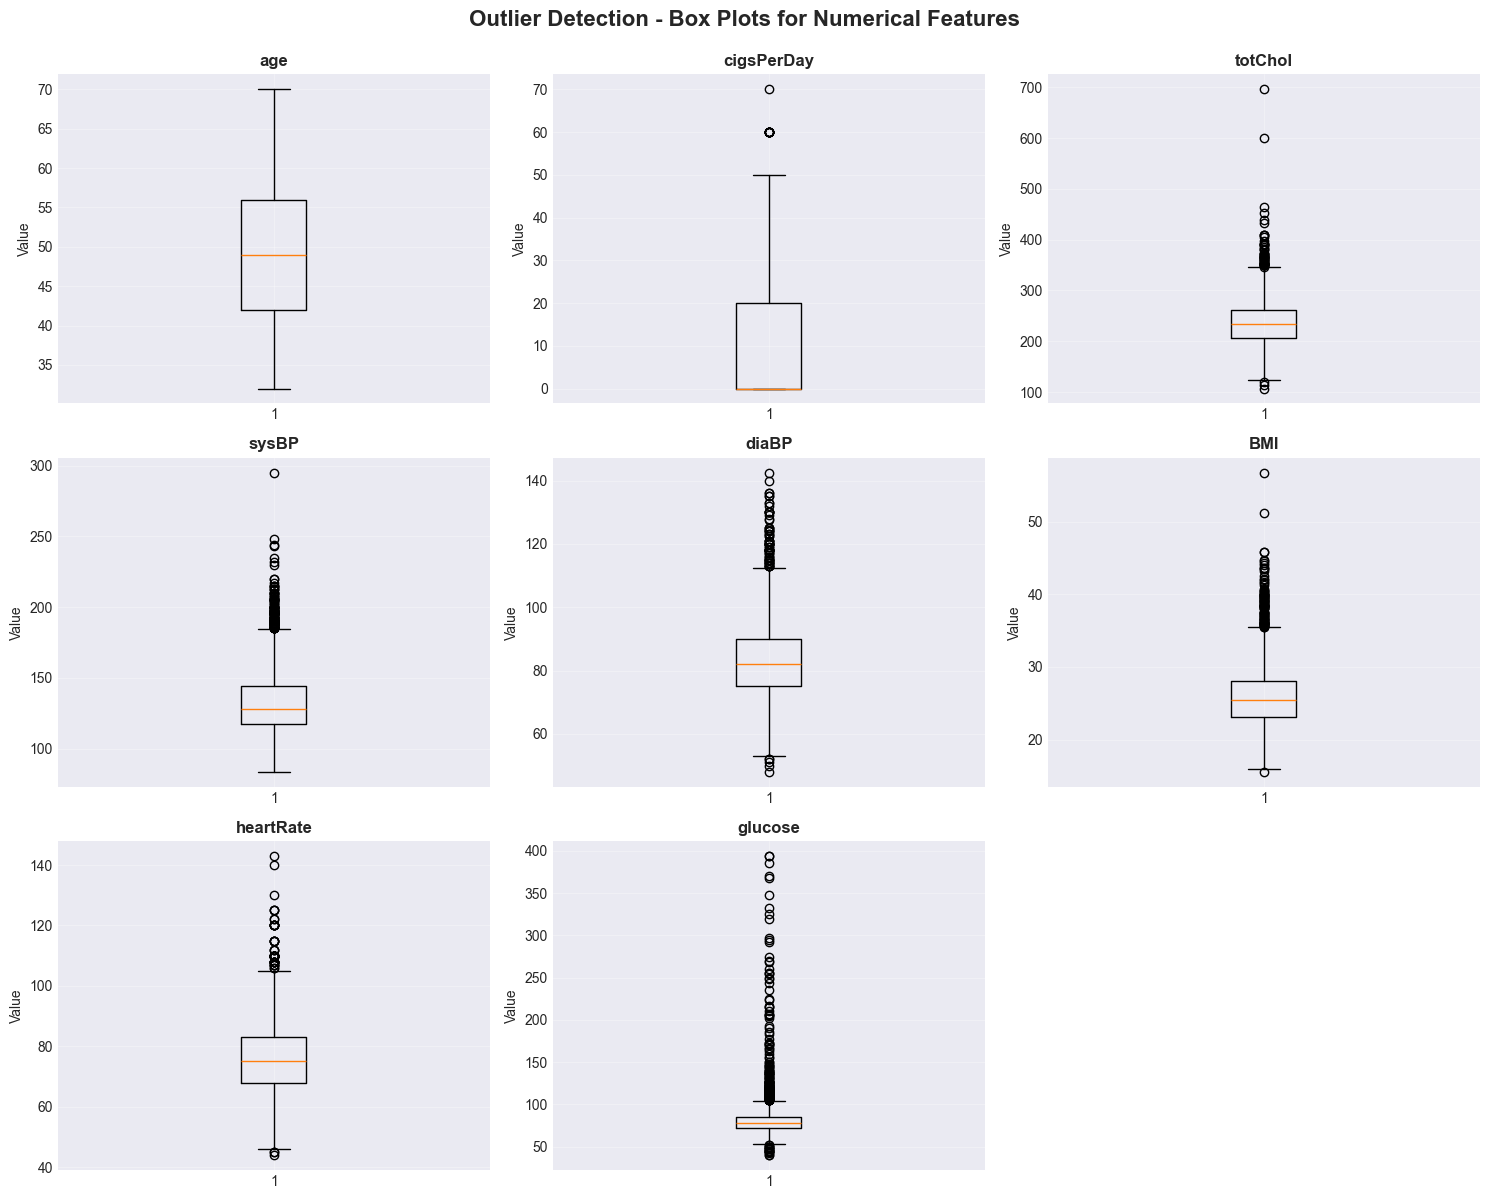


Note: Points beyond the whiskers are potential outliers
Decision: Keep outliers for now - they may represent legitimate extreme medical values


In [17]:
# Create a figure with subplots: 3 rows and 3 columns for 8 features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each numerical feature and create a box plot
for idx, col in enumerate(numerical_features_outliers):
    # Create box plot for this feature on the corresponding subplot
    axes[idx].boxplot(df_clean[col].dropna(), vert=True)
    
    # Set title with feature name
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    
    # Set y-axis label
    axes[idx].set_ylabel('Value')
    
    # Add grid for better readability
    axes[idx].grid(True, alpha=0.3)

# Hide the last subplot (we have 8 features but 9 subplots)
axes[8].axis('off')

# Add main title to the entire figure
plt.suptitle('Outlier Detection - Box Plots for Numerical Features', fontsize=16, fontweight='bold', y=0.995)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

print("\nNote: Points beyond the whiskers are potential outliers")
print("Decision: Keep outliers for now - they may represent legitimate extreme medical values")


## Step 10: Encode Categorical Variables


In [18]:
# Check data types and identify categorical variables
print("Checking Categorical Variables...")
print("=" * 80)

# Identify all columns and their data types
for col in df_clean.columns:
    # Get unique values count
    unique_count = df_clean[col].nunique()
    # Get data type
    dtype = df_clean[col].dtype
    
    # Print column information
    print(f"{col:20s}: dtype={str(dtype):10s}, unique_values={unique_count}")

print("\n" + "=" * 80)
print("Analysis:")
print("All variables are already numeric (int64/float64)")
print("Binary variables (0/1) already encoded:")
print("  - male (0=Female, 1=Male)")
print("  - currentSmoker (0=No, 1=Yes)")
print("  - BPMeds (0=No, 1=Yes)")
print("  - prevalentStroke (0=No, 1=Yes)")
print("  - prevalentHyp (0=No, 1=Yes)")
print("  - diabetes (0=No, 1=Yes)")
print("  - TenYearCHD (0=No CHD, 1=CHD Risk)")
print("\nNo additional encoding required!")


Checking Categorical Variables...
male                : dtype=int64     , unique_values=2
age                 : dtype=int64     , unique_values=39
education           : dtype=float64   , unique_values=4
currentSmoker       : dtype=int64     , unique_values=2
cigsPerDay          : dtype=float64   , unique_values=33
BPMeds              : dtype=float64   , unique_values=2
prevalentStroke     : dtype=int64     , unique_values=2
prevalentHyp        : dtype=int64     , unique_values=2
diabetes            : dtype=int64     , unique_values=2
totChol             : dtype=float64   , unique_values=248
sysBP               : dtype=float64   , unique_values=234
diaBP               : dtype=float64   , unique_values=146
BMI                 : dtype=float64   , unique_values=1364
heartRate           : dtype=float64   , unique_values=73
glucose             : dtype=float64   , unique_values=143
TenYearCHD          : dtype=int64     , unique_values=2

Analysis:
All variables are already numeric (int64/floa

## Step 11: Feature Scaling / Normalization


In [19]:
# Separate features (X) and target variable (y)
# X contains all columns except the target variable
X = df_clean.drop(columns=[target_column])

# y contains only the target variable (TenYearCHD)
y = df_clean[target_column]

print("Feature-Target Separation:")
print("=" * 80)
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape:   {y.shape}")
print(f"\nFeatures (X) columns: {list(X.columns)}")
print(f"Target (y) name:      {target_column}")

# Verify target distribution
print(f"\nTarget Distribution:")
print(y.value_counts())
print(f"\nTarget Percentage:")
print(y.value_counts(normalize=True) * 100)


Feature-Target Separation:
Features (X) shape: (4240, 15)
Target (y) shape:   (4240,)

Features (X) columns: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
Target (y) name:      TenYearCHD

Target Distribution:
TenYearCHD
0    3596
1     644
Name: count, dtype: int64

Target Percentage:
TenYearCHD
0    84.811321
1    15.188679
Name: proportion, dtype: float64


## Step 12: Train-Test Split


In [20]:
# Split the data into training and testing sets
# test_size=0.3 means 30% for testing, 70% for training
# random_state=42 ensures reproducibility (same split every time)
# stratify=y ensures both sets have same proportion of target classes

X_train, X_test, y_train, y_test = train_test_split(
    X,                    # Features
    y,                    # Target variable
    test_size=0.3,        # 30% test, 70% train
    random_state=42,      # Random seed for reproducibility
    stratify=y            # Maintain class proportions in both sets
)

print("Train-Test Split Complete!")
print("=" * 80)

# Print shapes of training and testing sets
print(f"\nTraining Set:")
print(f"  X_train shape: {X_train.shape} (samples, features)")
print(f"  y_train shape: {y_train.shape} (samples,)")

print(f"\nTesting Set:")
print(f"  X_test shape:  {X_test.shape} (samples, features)")
print(f"  y_test shape:  {y_test.shape} (samples,)")

# Calculate percentages
train_pct = (len(X_train) / len(X)) * 100
test_pct = (len(X_test) / len(X)) * 100

print(f"\nSplit Ratio:")
print(f"  Training: {len(X_train)} samples ({train_pct:.1f}%)")
print(f"  Testing:  {len(X_test)} samples ({test_pct:.1f}%)")

# Verify stratification (class distribution should be similar in train and test)
print(f"\nClass Distribution Verification:")
print(f"  Original:  {y.value_counts(normalize=True).values}")
print(f"  Training:  {y_train.value_counts(normalize=True).values}")
print(f"  Testing:   {y_test.value_counts(normalize=True).values}")
print("\n  Stratification preserved class balance!")


Train-Test Split Complete!

Training Set:
  X_train shape: (2968, 15) (samples, features)
  y_train shape: (2968,) (samples,)

Testing Set:
  X_test shape:  (1272, 15) (samples, features)
  y_test shape:  (1272,) (samples,)

Split Ratio:
  Training: 2968 samples (70.0%)
  Testing:  1272 samples (30.0%)

Class Distribution Verification:
  Original:  [0.84811321 0.15188679]
  Training:  [0.84804582 0.15195418]
  Testing:   [0.84827044 0.15172956]

  Stratification preserved class balance!


### Apply Feature Scaling (StandardScaler)


In [21]:
# Initialize StandardScaler
# StandardScaler transforms features to have mean=0 and standard deviation=1
# Formula: z = (x - mean) / std_dev
scaler = StandardScaler()

# Fit the scaler on training data ONLY (to avoid data leakage)
# This calculates the mean and std from X_train
scaler.fit(X_train)

# Transform both training and testing data using the fitted scaler
# Apply the same transformation learned from training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature Scaling Complete!")
print("=" * 80)

# Convert scaled arrays back to DataFrames for easier viewing
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nScaled Data Summary (Training Set):")
print(X_train_scaled_df.describe().T[['mean', 'std', 'min', 'max']])

print("\n" + "=" * 80)
print("Scaling Method: StandardScaler")
print("  Formula: z = (x - mean) / std_dev")
print("  Result: Features now have mean ~ 0 and std ~ 1")
print("  Benefits: Improves performance for SVM, KNN, Neural Networks, Logistic Regression")

# Note: We keep the scaled versions as numpy arrays for model training
print("\nData ready for model training!")
print(f"  X_train_scaled shape: {X_train_scaled.shape}")
print(f"  X_test_scaled shape:  {X_test_scaled.shape}")


Feature Scaling Complete!

Scaled Data Summary (Training Set):
                         mean       std       min        max
male             1.765584e-17  1.000169 -0.866025   1.154701
age             -2.358102e-16  1.000169 -2.059096   2.354220
education        1.675808e-17  1.000169 -0.971122   1.989122
currentSmoker    3.112215e-17  1.000169 -0.975371   1.025251
cigsPerDay       6.942635e-17  1.000169 -0.744804   5.138643
BPMeds           0.000000e+00  1.000169 -0.167502   5.970090
prevalentStroke  2.394012e-18  1.000169 -0.082367  12.140840
prevalentHyp    -9.576048e-18  1.000169 -0.669710   1.493184
diabetes         2.633413e-17  1.000169 -0.165364   6.047282
totChol         -3.040395e-16  1.000169 -2.934060   8.235963
sysBP           -4.560593e-16  1.000169 -2.234876   7.439853
diaBP           -1.993015e-16  1.000169 -2.941665   4.485156
BMI              4.853859e-16  1.000169 -2.491686   7.470121
heartRate       -3.722689e-16  1.000169 -2.549310   5.532638
glucose          2.226

## Data Cleaning & Pre-processing Summary


In [22]:
# Print comprehensive summary of data cleaning and preprocessing steps
print("=" * 80)
print(" " * 20 + "DATA CLEANING & PRE-PROCESSING SUMMARY")
print("=" * 80)

print("\n1. MISSING VALUES:")
print(f"   - Original missing values: {missing_before}")
print(f"   - After imputation: {missing_after}")
print(f"   - Method: Median imputation for numerical features")
print(f"   - Columns imputed: education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose")

print("\n2. OUTLIERS:")
print(f"   - Method: IQR (Interquartile Range) detection")
print(f"   - Decision: Kept outliers (legitimate extreme medical values)")
print(f"   - Outliers detected in: {len(outlier_summary)} features")

print("\n3. CATEGORICAL ENCODING:")
print(f"   - All variables already numeric")
print(f"   - Binary variables (0/1) pre-encoded")
print(f"   - No additional encoding required")

print("\n4. FEATURE-TARGET SEPARATION:")
print(f"   - Features (X): {X.shape}")
print(f"   - Target (y): {y.shape}")
print(f"   - Target variable: {target_column}")

print("\n5. TRAIN-TEST SPLIT:")
print(f"   - Training set: {X_train.shape[0]} samples ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"   - Testing set: {X_test.shape[0]} samples ({(X_test.shape[0]/len(X))*100:.1f}%)")
print(f"   - Method: Stratified split (preserves class balance)")
print(f"   - Random state: 42 (reproducible)")

print("\n6. FEATURE SCALING:")
print(f"   - Method: StandardScaler (mean=0, std=1)")
print(f"   - Applied to: Both training and testing sets")
print(f"   - X_train_scaled: {X_train_scaled.shape}")
print(f"   - X_test_scaled: {X_test_scaled.shape}")

print("\n" + "=" * 80)
print("DATA IS READY FOR MODEL TRAINING!")
print("=" * 80)


                    DATA CLEANING & PRE-PROCESSING SUMMARY

1. MISSING VALUES:
   - Original missing values: 645
   - After imputation: 0
   - Method: Median imputation for numerical features
   - Columns imputed: education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose

2. OUTLIERS:
   - Method: IQR (Interquartile Range) detection
   - Decision: Kept outliers (legitimate extreme medical values)
   - Outliers detected in: 8 features

3. CATEGORICAL ENCODING:
   - All variables already numeric
   - Binary variables (0/1) pre-encoded
   - No additional encoding required

4. FEATURE-TARGET SEPARATION:
   - Features (X): (4240, 15)
   - Target (y): (4240,)
   - Target variable: TenYearCHD

5. TRAIN-TEST SPLIT:
   - Training set: 2968 samples (70.0%)
   - Testing set: 1272 samples (30.0%)
   - Method: Stratified split (preserves class balance)
   - Random state: 42 (reproducible)

6. FEATURE SCALING:
   - Method: StandardScaler (mean=0, std=1)
   - Applied to: Both training and testi

---

# Part 3: Exploratory Data Analysis (EDA)

Visualizations and statistical analysis to understand feature relationships and patterns.


## Step 13: Correlation Analysis


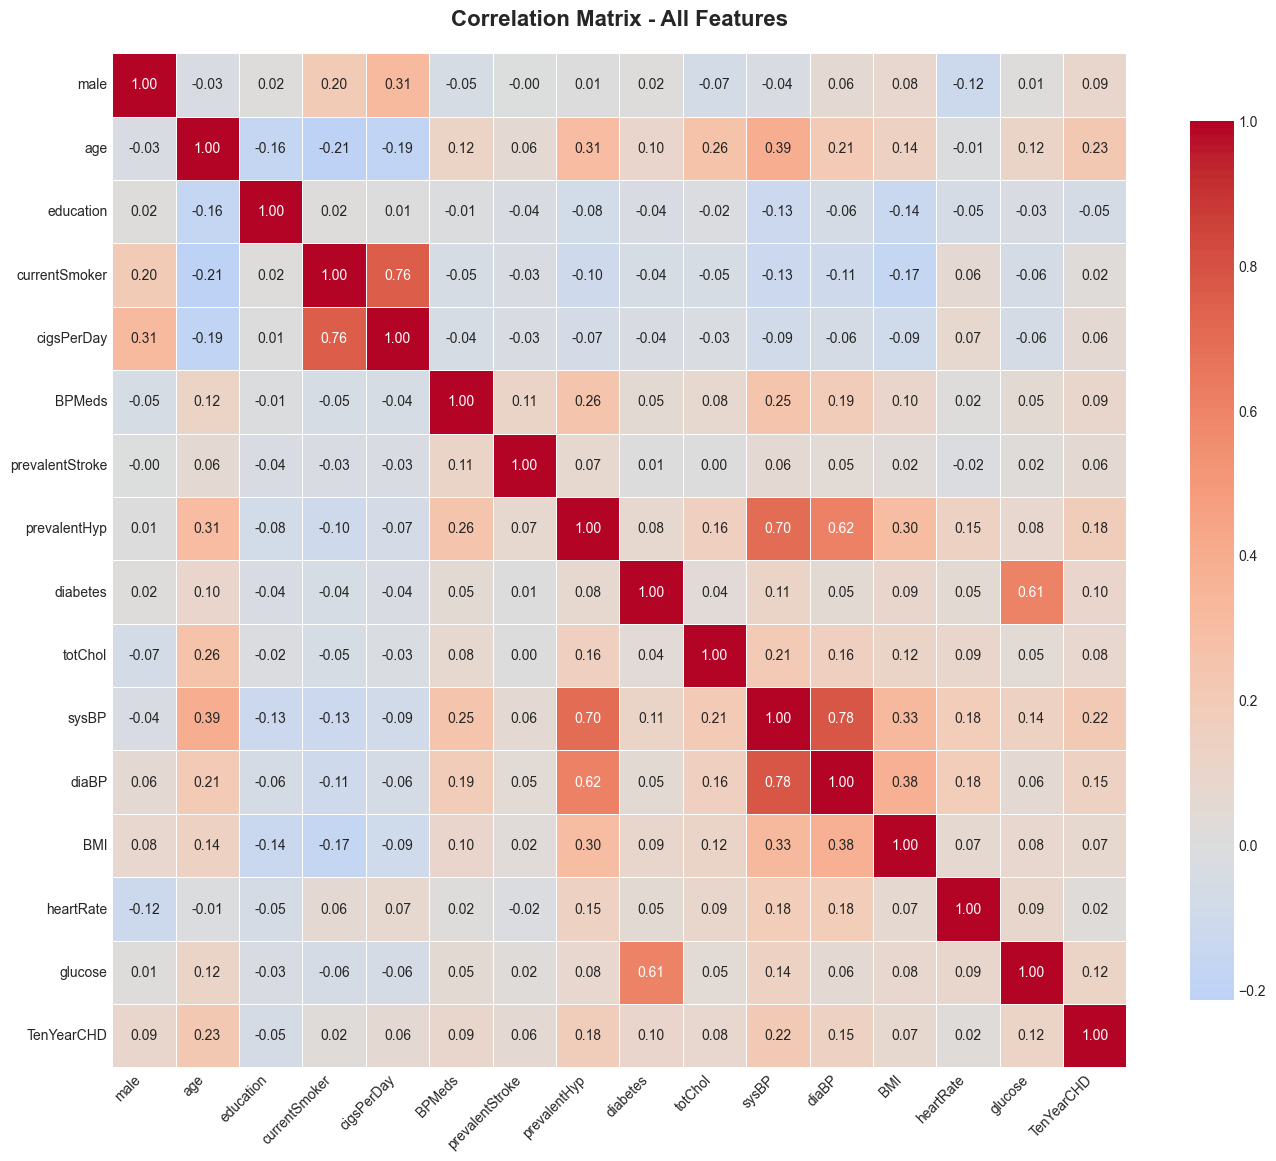


Correlation Analysis Notes:
- Values range from -1 (perfect negative correlation) to +1 (perfect positive)
- Values close to 0 indicate weak or no linear relationship
- High correlation between features may indicate multicollinearity


In [23]:
# Calculate correlation matrix for all features including target
# Correlation measures linear relationship between variables (-1 to +1)
correlation_matrix = df_clean.corr()

# Create a large figure for the heatmap
plt.figure(figsize=(14, 12))

# Create heatmap using seaborn
# annot=True displays correlation values in each cell
# fmt='.2f' formats numbers to 2 decimal places
# cmap='coolwarm' uses blue-white-red color scheme (negative-zero-positive)
# center=0 centers the colormap at zero
# square=True makes each cell square-shaped
# linewidths=0.5 adds small lines between cells
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            fmt='.2f',            # Format to 2 decimals
            cmap='coolwarm',      # Color scheme
            center=0,             # Center colormap at 0
            square=True,          # Square cells
            linewidths=0.5,       # Cell borders
            cbar_kws={"shrink": 0.8})  # Colorbar size

# Set title
plt.title('Correlation Matrix - All Features', fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

print("\nCorrelation Analysis Notes:")
print("=" * 80)
print("- Values range from -1 (perfect negative correlation) to +1 (perfect positive)")
print("- Values close to 0 indicate weak or no linear relationship")
print("- High correlation between features may indicate multicollinearity")


Feature Correlations with Target Variable (TenYearCHD):
age                 :  0.2254  (Moderate)
sysBP               :  0.2164  (Moderate)
prevalentHyp        :  0.1775  (Moderate)
diaBP               :  0.1451  (Moderate)
glucose             :  0.1213  (Moderate)
diabetes            :  0.0973  (Weak)
male                :  0.0884  (Weak)
BPMeds              :  0.0864  (Weak)
totChol             :  0.0817  (Weak)
BMI                 :  0.0743  (Weak)
prevalentStroke     :  0.0618  (Weak)
cigsPerDay          :  0.0587  (Weak)
heartRate           :  0.0229  (Weak)
currentSmoker       :  0.0194  (Weak)
education           : -0.0536  (Weak)


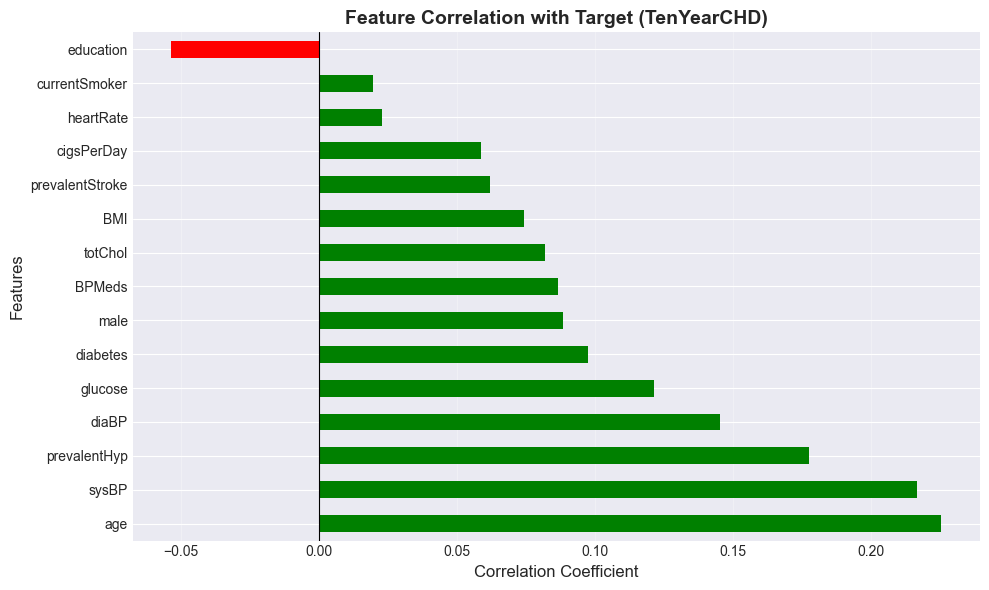


Key Insights:
- Positive correlation: As feature increases, CHD risk increases
- Negative correlation: As feature increases, CHD risk decreases
- Stronger correlations are more predictive of heart disease


In [24]:
# Extract correlation values with the target variable
# Get correlations with TenYearCHD and sort by absolute value
target_corr = correlation_matrix[target_column].sort_values(ascending=False)

print("Feature Correlations with Target Variable (TenYearCHD):")
print("=" * 80)

# Loop through and print each feature's correlation
for feature, corr_value in target_corr.items():
    # Skip the target itself (correlation with itself is always 1.0)
    if feature != target_column:
        # Determine strength of correlation
        if abs(corr_value) > 0.3:
            strength = "Strong"
        elif abs(corr_value) > 0.1:
            strength = "Moderate"
        else:
            strength = "Weak"
        
        # Print feature name, correlation value, and strength
        print(f"{feature:20s}: {corr_value:7.4f}  ({strength})")

# Visualize top correlations with target
plt.figure(figsize=(10, 6))

# Remove target from the list and get top 10 features
target_corr_features = target_corr.drop(target_column)

# Create horizontal bar plot
target_corr_features.plot(kind='barh', color=['red' if x < 0 else 'green' for x in target_corr_features])

# Set labels and title
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Correlation with Target (TenYearCHD)', fontsize=14, fontweight='bold')

# Add a vertical line at x=0
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)

# Add grid for better readability
plt.grid(axis='x', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

print("\nKey Insights:")
print("- Positive correlation: As feature increases, CHD risk increases")
print("- Negative correlation: As feature increases, CHD risk decreases")
print("- Stronger correlations are more predictive of heart disease")


## Step 14: Feature Distributions by Target Class


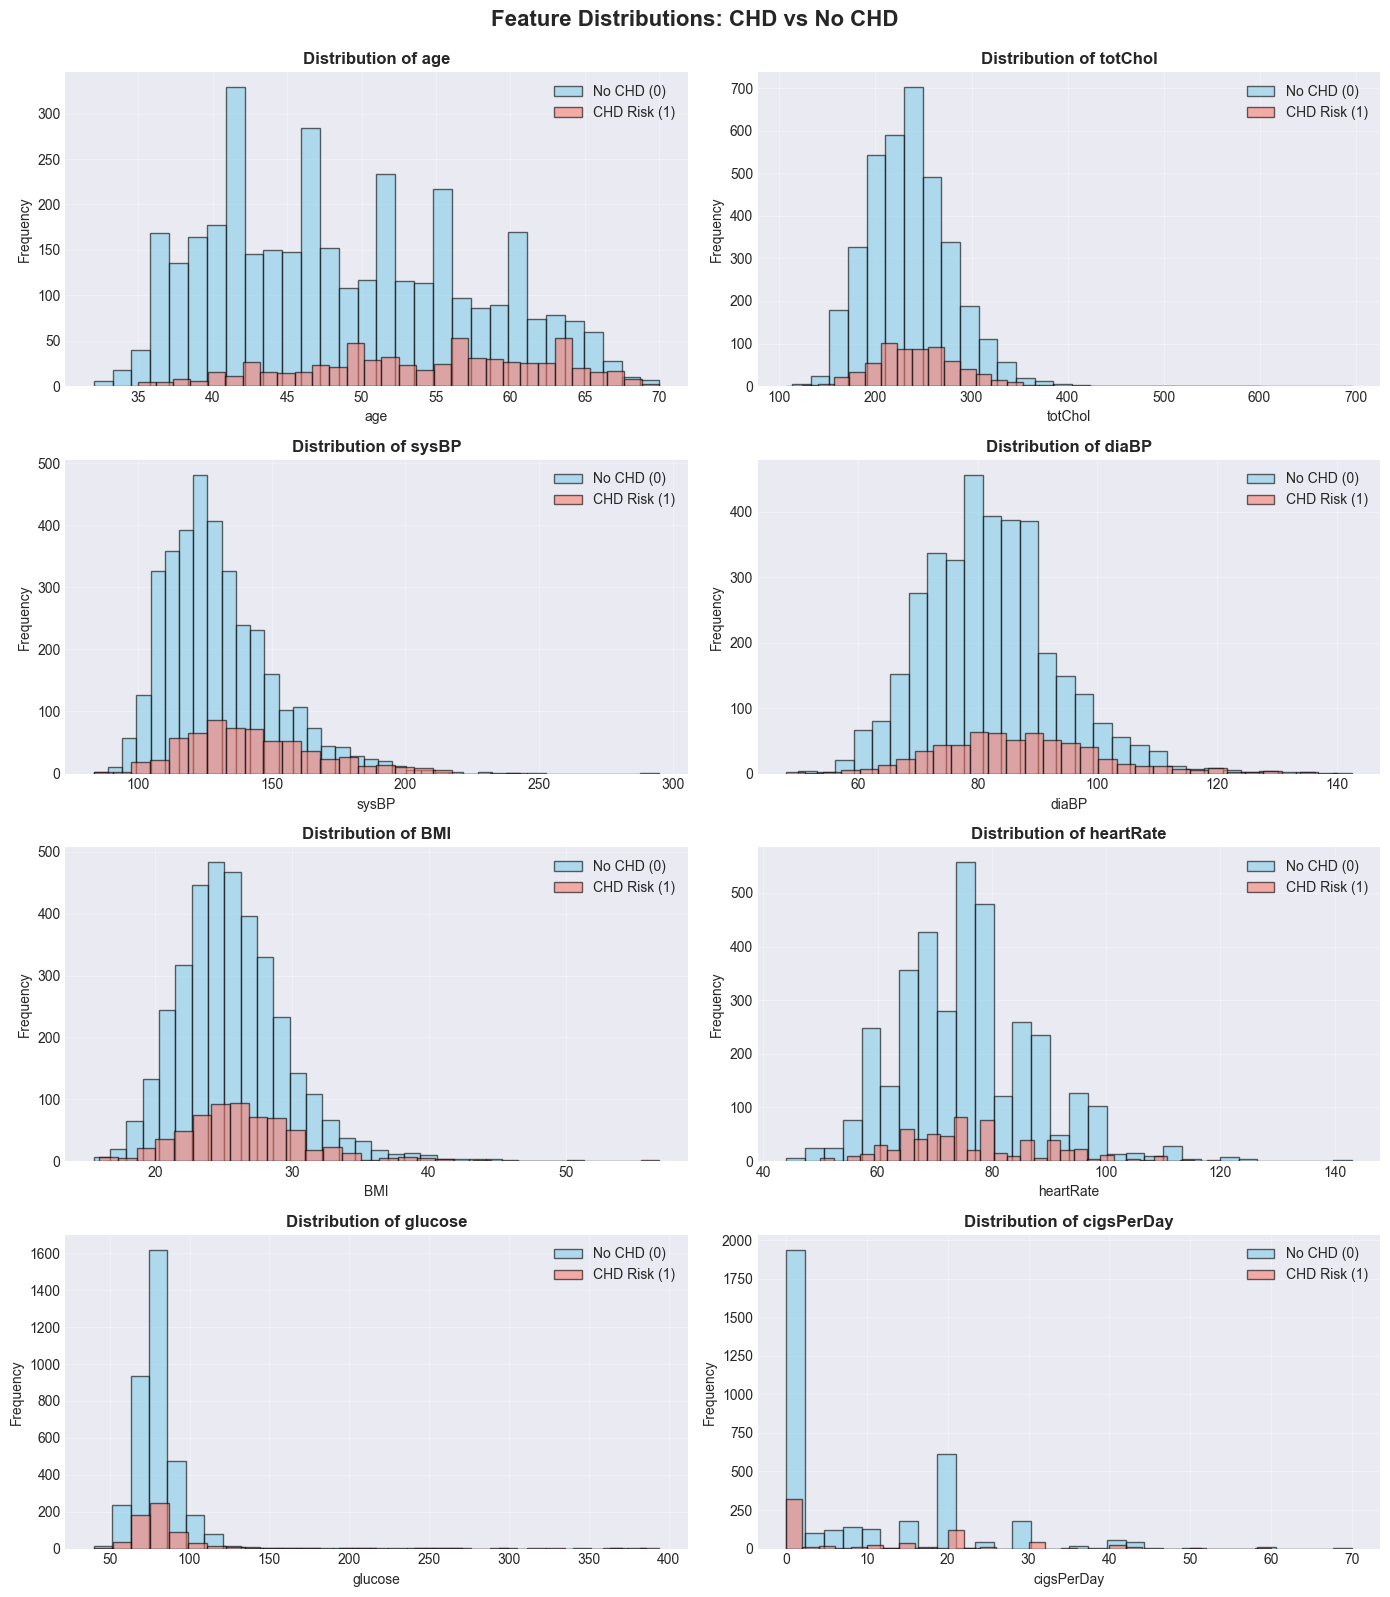


Observations:
- Compare distributions between CHD and No CHD patients
- Overlapping distributions = feature less discriminative
- Separated distributions = feature more predictive


In [25]:
# Select key continuous features to visualize
features_to_plot = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'cigsPerDay']

# Create subplots: 4 rows x 2 columns
fig, axes = plt.subplots(4, 2, figsize=(14, 16))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through each feature and create distribution plots
for idx, feature in enumerate(features_to_plot):
    # Plot histogram for CHD = 0 (No heart disease)
    axes[idx].hist(df_clean[df_clean[target_column] == 0][feature].dropna(), 
                   bins=30,              # Number of bins
                   alpha=0.6,            # Transparency
                   label='No CHD (0)',   # Legend label
                   color='skyblue',      # Color
                   edgecolor='black')    # Border color
    
    # Plot histogram for CHD = 1 (Has heart disease)
    axes[idx].hist(df_clean[df_clean[target_column] == 1][feature].dropna(), 
                   bins=30, 
                   alpha=0.6, 
                   label='CHD Risk (1)', 
                   color='salmon',
                   edgecolor='black')
    
    # Set title, labels, and legend
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

# Add main title
plt.suptitle('Feature Distributions: CHD vs No CHD', fontsize=16, fontweight='bold', y=0.995)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

print("\nObservations:")
print("- Compare distributions between CHD and No CHD patients")
print("- Overlapping distributions = feature less discriminative")
print("- Separated distributions = feature more predictive")


---

# Part 4: Model Training & Evaluation

Training multiple machine learning models and evaluating their performance.


## Import Machine Learning Models


In [26]:
# Import Logistic Regression - linear model for binary classification
from sklearn.linear_model import LogisticRegression

# Import Decision Tree Classifier - tree-based model
from sklearn.tree import DecisionTreeClassifier

# Import Random Forest Classifier - ensemble of decision trees
from sklearn.ensemble import RandomForestClassifier

# Import Gradient Boosting Classifier - boosting ensemble method
from sklearn.ensemble import GradientBoostingClassifier

# Import Support Vector Machine - finds optimal hyperplane for classification
from sklearn.svm import SVC

# Import K-Nearest Neighbors - classifies based on nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import Naive Bayes - probabilistic classifier based on Bayes' theorem
from sklearn.naive_bayes import GaussianNB

# Import XGBoost (if available) - advanced gradient boosting library
try:
    from xgboost import XGBClassifier
    xgboost_available = True
    print("XGBoost is available")
except ImportError:
    xgboost_available = False
    print("XGBoost not available - skipping XGBoost model")

# Import evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score

print("\nAll models imported successfully!")
print("=" * 80)


XGBoost is available

All models imported successfully!


## Step 15: Train Logistic Regression Model


In [27]:
# Initialize Logistic Regression model
# max_iter=1000 sets maximum iterations for convergence
# random_state=42 for reproducibility
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on scaled training data
# fit() learns the coefficients from X_train_scaled and y_train
log_reg.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Calculate evaluation metrics
# Accuracy: percentage of correct predictions
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Precision: of all predicted positive, how many are actually positive
precision_log_reg = precision_score(y_test, y_pred_log_reg)

# Recall (Sensitivity): of all actual positive, how many did we catch
recall_log_reg = recall_score(y_test, y_pred_log_reg)

# F1-Score: harmonic mean of precision and recall
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# ROC-AUC: area under ROC curve (higher = better)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)

# Print results
print("=" * 80)
print("LOGISTIC REGRESSION - MODEL EVALUATION")
print("=" * 80)
print(f"\nAccuracy:  {accuracy_log_reg:.4f} ({accuracy_log_reg*100:.2f}%)")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall:    {recall_log_reg:.4f}")
print(f"F1-Score:  {f1_log_reg:.4f}")
print(f"ROC-AUC:   {roc_auc_log_reg:.4f}")

# Print confusion matrix
print(f"\nConfusion Matrix:")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print(cm_log_reg)
print(f"\nInterpretation:")
print(f"  True Negatives (TN):  {cm_log_reg[0][0]} - Correctly predicted No CHD")
print(f"  False Positives (FP): {cm_log_reg[0][1]} - Incorrectly predicted CHD")
print(f"  False Negatives (FN): {cm_log_reg[1][0]} - Missed CHD cases")
print(f"  True Positives (TP):  {cm_log_reg[1][1]} - Correctly predicted CHD")

print("\nModel trained successfully!")


LOGISTIC REGRESSION - MODEL EVALUATION

Accuracy:  0.8459 (84.59%)
Precision: 0.4400
Recall:    0.0570
F1-Score:  0.1009
ROC-AUC:   0.5220

Confusion Matrix:
[[1065   14]
 [ 182   11]]

Interpretation:
  True Negatives (TN):  1065 - Correctly predicted No CHD
  False Positives (FP): 14 - Incorrectly predicted CHD
  False Negatives (FN): 182 - Missed CHD cases
  True Positives (TP):  11 - Correctly predicted CHD

Model trained successfully!


## Step 16: Train Random Forest Model


In [28]:
# Initialize Random Forest model
# n_estimators=100 means 100 decision trees in the forest
# random_state=42 for reproducibility
# n_jobs=-1 uses all CPU cores for faster training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on scaled training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Print results
print("=" * 80)
print("RANDOM FOREST - MODEL EVALUATION")
print("=" * 80)
print(f"\nAccuracy:  {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1-Score:  {f1_rf:.4f}")
print(f"ROC-AUC:   {roc_auc_rf:.4f}")

# Print confusion matrix
print(f"\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
print(f"\nInterpretation:")
print(f"  True Negatives (TN):  {cm_rf[0][0]} - Correctly predicted No CHD")
print(f"  False Positives (FP): {cm_rf[0][1]} - Incorrectly predicted CHD")
print(f"  False Negatives (FN): {cm_rf[1][0]} - Missed CHD cases")
print(f"  True Positives (TP):  {cm_rf[1][1]} - Correctly predicted CHD")

print("\nModel trained successfully!")


RANDOM FOREST - MODEL EVALUATION

Accuracy:  0.8443 (84.43%)
Precision: 0.4074
Recall:    0.0570
F1-Score:  0.1000
ROC-AUC:   0.5211

Confusion Matrix:
[[1063   16]
 [ 182   11]]

Interpretation:
  True Negatives (TN):  1063 - Correctly predicted No CHD
  False Positives (FP): 16 - Incorrectly predicted CHD
  False Negatives (FN): 182 - Missed CHD cases
  True Positives (TP):  11 - Correctly predicted CHD

Model trained successfully!


## Step 17: Train Additional Models (SVM, KNN, Gradient Boosting)


In [29]:
# Dictionary to store all models and their results
models_results = {}

print("Training Multiple Models...")
print("=" * 80)

# === 1. Support Vector Machine (SVM) ===
print("\n1. Training SVM...")
# Initialize SVM with RBF kernel, probability=True enables predict_proba()
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
# Train the model
svm_model.fit(X_train_scaled, y_train)
# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)
# Store results
models_results['SVM'] = {
    'model': svm_model,
    'predictions': y_pred_svm,
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'precision': precision_score(y_test, y_pred_svm),
    'recall': recall_score(y_test, y_pred_svm),
    'f1': f1_score(y_test, y_pred_svm),
    'roc_auc': roc_auc_score(y_test, y_pred_svm)
}
print(f"   Accuracy: {models_results['SVM']['accuracy']:.4f}")

# === 2. K-Nearest Neighbors (KNN) ===
print("\n2. Training KNN...")
# Initialize KNN with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn_model.fit(X_train_scaled, y_train)
# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)
# Store results
models_results['KNN'] = {
    'model': knn_model,
    'predictions': y_pred_knn,
    'accuracy': accuracy_score(y_test, y_pred_knn),
    'precision': precision_score(y_test, y_pred_knn),
    'recall': recall_score(y_test, y_pred_knn),
    'f1': f1_score(y_test, y_pred_knn),
    'roc_auc': roc_auc_score(y_test, y_pred_knn)
}
print(f"   Accuracy: {models_results['KNN']['accuracy']:.4f}")

# === 3. Gradient Boosting ===
print("\n3. Training Gradient Boosting...")
# Initialize Gradient Boosting with 100 estimators
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
# Train the model
gb_model.fit(X_train_scaled, y_train)
# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)
# Store results
models_results['Gradient Boosting'] = {
    'model': gb_model,
    'predictions': y_pred_gb,
    'accuracy': accuracy_score(y_test, y_pred_gb),
    'precision': precision_score(y_test, y_pred_gb),
    'recall': recall_score(y_test, y_pred_gb),
    'f1': f1_score(y_test, y_pred_gb),
    'roc_auc': roc_auc_score(y_test, y_pred_gb)
}
print(f"   Accuracy: {models_results['Gradient Boosting']['accuracy']:.4f}")

# === 4. Decision Tree ===
print("\n4. Training Decision Tree...")
# Initialize Decision Tree with max_depth to prevent overfitting
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
# Train the model
dt_model.fit(X_train_scaled, y_train)
# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)
# Store results
models_results['Decision Tree'] = {
    'model': dt_model,
    'predictions': y_pred_dt,
    'accuracy': accuracy_score(y_test, y_pred_dt),
    'precision': precision_score(y_test, y_pred_dt),
    'recall': recall_score(y_test, y_pred_dt),
    'f1': f1_score(y_test, y_pred_dt),
    'roc_auc': roc_auc_score(y_test, y_pred_dt)
}
print(f"   Accuracy: {models_results['Decision Tree']['accuracy']:.4f}")

# === 5. Naive Bayes ===
print("\n5. Training Naive Bayes...")
# Initialize Gaussian Naive Bayes
nb_model = GaussianNB()
# Train the model
nb_model.fit(X_train_scaled, y_train)
# Make predictions
y_pred_nb = nb_model.predict(X_test_scaled)
# Store results
models_results['Naive Bayes'] = {
    'model': nb_model,
    'predictions': y_pred_nb,
    'accuracy': accuracy_score(y_test, y_pred_nb),
    'precision': precision_score(y_test, y_pred_nb),
    'recall': recall_score(y_test, y_pred_nb),
    'f1': f1_score(y_test, y_pred_nb),
    'roc_auc': roc_auc_score(y_test, y_pred_nb)
}
print(f"   Accuracy: {models_results['Naive Bayes']['accuracy']:.4f}")

# Add previously trained models to the dictionary
models_results['Logistic Regression'] = {
    'predictions': y_pred_log_reg,
    'accuracy': accuracy_log_reg,
    'precision': precision_log_reg,
    'recall': recall_log_reg,
    'f1': f1_log_reg,
    'roc_auc': roc_auc_log_reg
}

models_results['Random Forest'] = {
    'predictions': y_pred_rf,
    'accuracy': accuracy_rf,
    'precision': precision_rf,
    'recall': recall_rf,
    'f1': f1_rf,
    'roc_auc': roc_auc_rf
}

print("\n" + "=" * 80)
print("All models trained successfully!")
print(f"Total models: {len(models_results)}")


Training Multiple Models...

1. Training SVM...
   Accuracy: 0.8498

2. Training KNN...
   Accuracy: 0.8412

3. Training Gradient Boosting...
   Accuracy: 0.8428

4. Training Decision Tree...
   Accuracy: 0.8200

5. Training Naive Bayes...
   Accuracy: 0.8129

All models trained successfully!
Total models: 7


## Step 18: Model Comparison


                         MODEL COMPARISON
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
                SVM  0.849843   0.625000 0.025907  0.049751 0.511563
Logistic Regression  0.845912   0.440000 0.056995  0.100917 0.522010
      Random Forest  0.844340   0.407407 0.056995  0.100000 0.521083
  Gradient Boosting  0.842767   0.418605 0.093264  0.152542 0.535047
                KNN  0.841195   0.418182 0.119171  0.185484 0.544757
      Decision Tree  0.819969   0.269231 0.108808  0.154982 0.527991
        Naive Bayes  0.812893   0.300885 0.176166  0.222222 0.551475

Best Model: SVM
Best Accuracy: 0.8498 (84.98%)


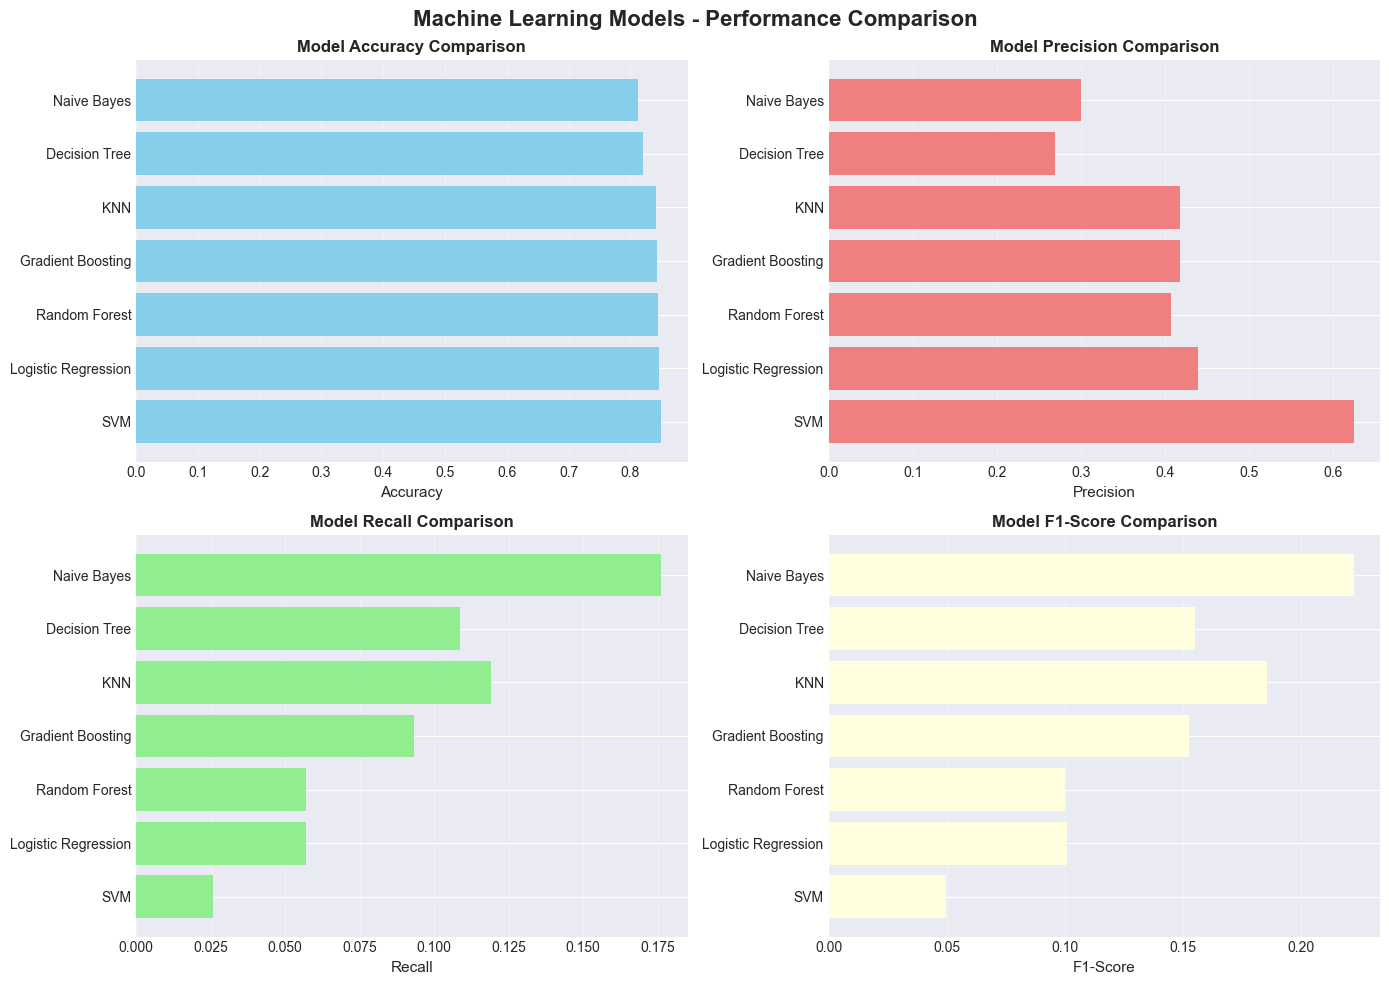


Metrics Explanation:
- Accuracy: Overall correctness of predictions
- Precision: Of predicted CHD cases, how many are actually CHD
- Recall: Of actual CHD cases, how many did we identify
- F1-Score: Balance between Precision and Recall


In [30]:
# Create a DataFrame to compare all models
comparison_data = []

# Loop through each model and extract its metrics
for model_name, results in models_results.items():
    comparison_data.append({
        'Model': model_name,
        'Accuracy': results['accuracy'],
        'Precision': results['precision'],
        'Recall': results['recall'],
        'F1-Score': results['f1'],
        'ROC-AUC': results['roc_auc']
    })

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Sort by accuracy (descending order)
comparison_df = comparison_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

# Print the comparison table
print("=" * 80)
print(" " * 25 + "MODEL COMPARISON")
print("=" * 80)
print(comparison_df.to_string(index=False))
print("=" * 80)

# Find the best model based on accuracy
best_model_name = comparison_df.iloc[0]['Model']
best_accuracy = comparison_df.iloc[0]['Accuracy']

print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# Visualize the comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Accuracy comparison
axes[0, 0].barh(comparison_df['Model'], comparison_df['Accuracy'], color='skyblue')
axes[0, 0].set_xlabel('Accuracy', fontsize=11)
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# Plot 2: Precision comparison
axes[0, 1].barh(comparison_df['Model'], comparison_df['Precision'], color='lightcoral')
axes[0, 1].set_xlabel('Precision', fontsize=11)
axes[0, 1].set_title('Model Precision Comparison', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 3: Recall comparison
axes[1, 0].barh(comparison_df['Model'], comparison_df['Recall'], color='lightgreen')
axes[1, 0].set_xlabel('Recall', fontsize=11)
axes[1, 0].set_title('Model Recall Comparison', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# Plot 4: F1-Score comparison
axes[1, 1].barh(comparison_df['Model'], comparison_df['F1-Score'], color='lightyellow')
axes[1, 1].set_xlabel('F1-Score', fontsize=11)
axes[1, 1].set_title('Model F1-Score Comparison', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

# Add main title
plt.suptitle('Machine Learning Models - Performance Comparison', fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

print("\nMetrics Explanation:")
print("- Accuracy: Overall correctness of predictions")
print("- Precision: Of predicted CHD cases, how many are actually CHD")
print("- Recall: Of actual CHD cases, how many did we identify")
print("- F1-Score: Balance between Precision and Recall")


## Final Summary


---

# Part 5: Unsupervised Learning

Clustering patients into risk profiles and detecting anomalous cases for deeper insights.


## Import Unsupervised Learning Libraries


In [31]:
# Import K-Means clustering algorithm - groups similar patients together
from sklearn.cluster import KMeans

# Import Agglomerative Clustering - hierarchical clustering method
from sklearn.cluster import AgglomerativeClustering

# Import DBSCAN - density-based clustering, can find outliers
from sklearn.cluster import DBSCAN

# Import Isolation Forest - anomaly detection algorithm
from sklearn.ensemble import IsolationForest

# Import metrics for clustering evaluation
from sklearn.metrics import silhouette_score, silhouette_samples

# Import PCA (Principal Component Analysis) for dimensionality reduction visualization
from sklearn.decomposition import PCA

print("Unsupervised learning libraries imported successfully!")
print("=" * 80)


Unsupervised learning libraries imported successfully!


## Step 19: K-Means Clustering - Group Patients into Risk Profiles


Finding Optimal Number of Clusters (Elbow Method)...
k=2: WCSS = 37846.45
k=3: WCSS = 34357.24
k=4: WCSS = 30592.16
k=5: WCSS = 27730.96
k=6: WCSS = 25242.38
k=7: WCSS = 25256.35
k=8: WCSS = 22609.67


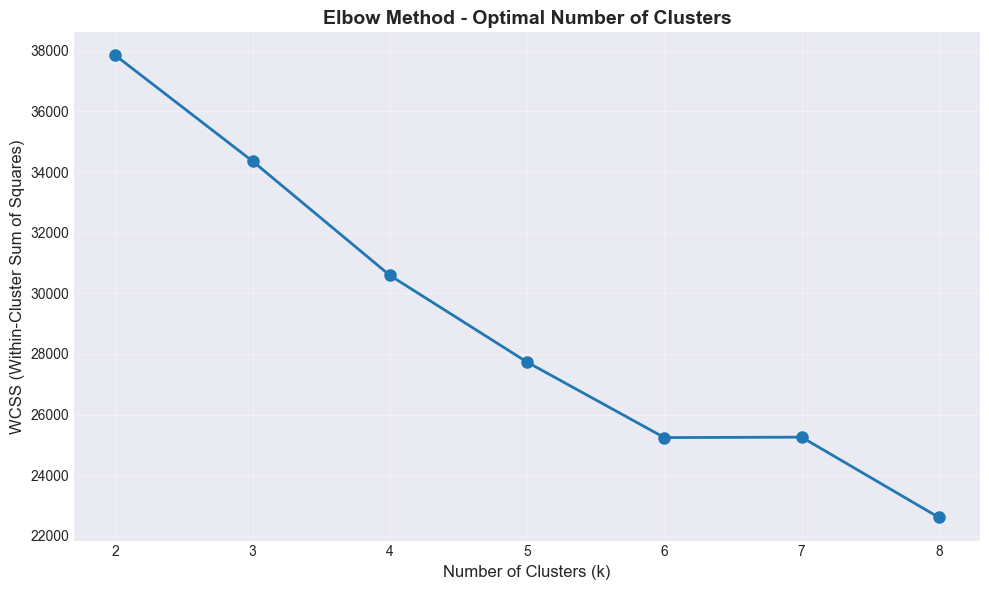


Elbow Method: Look for the 'elbow' - point where WCSS starts decreasing slowly
This indicates optimal number of clusters


In [32]:
# Determine optimal number of clusters using Elbow Method
# We'll test k values from 2 to 8
k_range = range(2, 9)

# Store Within-Cluster-Sum-of-Squares (WCSS) for each k
wcss_scores = []

print("Finding Optimal Number of Clusters (Elbow Method)...")
print("=" * 80)

# Loop through different k values
for k in k_range:
    # Initialize K-Means with k clusters, random_state for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Fit the model on scaled training data
    kmeans.fit(X_train_scaled)
    
    # Calculate WCSS (inertia) - sum of squared distances to centroids
    # Lower WCSS = better clustering (points closer to their centroids)
    wcss = kmeans.inertia_
    wcss_scores.append(wcss)
    
    # Print progress
    print(f"k={k}: WCSS = {wcss:.2f}")

# Visualize Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss_scores, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method - Optimal Number of Clusters', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.tight_layout()
plt.show()

print("\nElbow Method: Look for the 'elbow' - point where WCSS starts decreasing slowly")
print("This indicates optimal number of clusters")


Calculating Silhouette Scores for Different k Values...
k=2: Silhouette Score = 0.2129
k=3: Silhouette Score = 0.1282
k=4: Silhouette Score = 0.1433
k=5: Silhouette Score = 0.1542
k=6: Silhouette Score = 0.1731
k=7: Silhouette Score = 0.1152
k=8: Silhouette Score = 0.1608

Optimal number of clusters: k=2 (Silhouette Score: 0.2129)


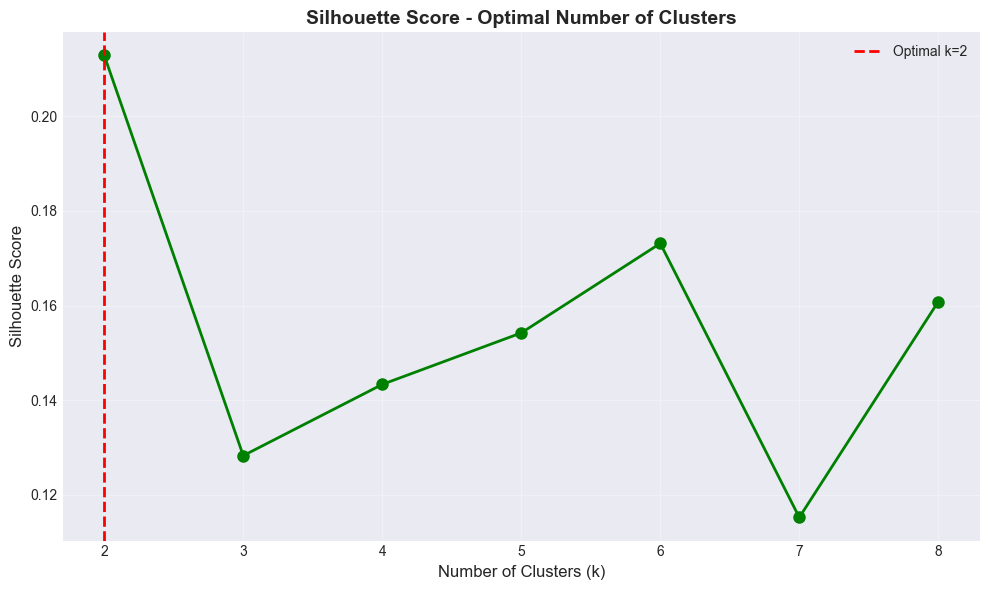


Silhouette Score Interpretation:
- Score close to +1: Well-separated clusters
- Score close to 0: Overlapping clusters
- Score close to -1: Wrongly assigned clusters


In [33]:
# Use Silhouette Score to find optimal number of clusters
# Silhouette score ranges from -1 to +1
# Higher score = better defined clusters

silhouette_scores = []

print("Calculating Silhouette Scores for Different k Values...")
print("=" * 80)

# Loop through different k values
for k in k_range:
    # Initialize K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Fit and predict cluster labels
    cluster_labels = kmeans.fit_predict(X_train_scaled)
    
    # Calculate silhouette score
    # Measures how similar an object is to its own cluster vs other clusters
    silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"k={k}: Silhouette Score = {silhouette_avg:.4f}")

# Find optimal k (highest silhouette score)
optimal_k = k_range[np.argmax(silhouette_scores)]
best_silhouette = max(silhouette_scores)

print(f"\nOptimal number of clusters: k={optimal_k} (Silhouette Score: {best_silhouette:.4f})")

# Visualize Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linewidth=2, markersize=8, color='green')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score - Optimal Number of Clusters', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, label=f'Optimal k={optimal_k}')
plt.legend()
plt.tight_layout()
plt.show()

print("\nSilhouette Score Interpretation:")
print("- Score close to +1: Well-separated clusters")
print("- Score close to 0: Overlapping clusters")
print("- Score close to -1: Wrongly assigned clusters")


In [34]:
# Train final K-Means model with optimal number of clusters
# Use the optimal_k determined from silhouette score, or default to 3 if not determined
try:
    final_k = optimal_k
except NameError:
    final_k = 3  # Default value if optimal_k not calculated yet

print(f"Training Final K-Means Model with k={final_k} clusters...")
print("=" * 80)

# Initialize and train K-Means with optimal k
kmeans_final = KMeans(n_clusters=final_k, random_state=42, n_init=10)

# Fit on training data and predict cluster assignments
cluster_labels_train = kmeans_final.fit_predict(X_train_scaled)

# Predict clusters for test data (using fitted model)
cluster_labels_test = kmeans_final.predict(X_test_scaled)

# Add cluster labels to original dataframes
df_train_with_clusters = df_clean.iloc[X_train.index].copy()
df_train_with_clusters['cluster'] = cluster_labels_train

df_test_with_clusters = df_clean.iloc[X_test.index].copy()
df_test_with_clusters['cluster'] = cluster_labels_test

print(f"Training set clustered into {final_k} clusters:")
print(cluster_labels_train)

# Count patients in each cluster
cluster_counts = pd.Series(cluster_labels_train).value_counts().sort_index()
print(f"\nCluster Distribution (Training Set):")
for cluster_id in range(final_k):
    count = cluster_counts[cluster_id] if cluster_id in cluster_counts.index else 0
    pct = (count / len(cluster_labels_train)) * 100
    print(f"  Cluster {cluster_id}: {count} patients ({pct:.1f}%)")

print("\nK-Means clustering completed successfully!")


Training Final K-Means Model with k=2 clusters...


Training set clustered into 2 clusters:
[0 1 0 ... 1 1 1]

Cluster Distribution (Training Set):
  Cluster 0: 946 patients (31.9%)
  Cluster 1: 2022 patients (68.1%)

K-Means clustering completed successfully!


### Analyze Cluster Characteristics - Risk Profiles


In [35]:
# Analyze characteristics of each cluster to identify risk profiles
print("=" * 80)
print("CLUSTER ANALYSIS - RISK PROFILES")
print("=" * 80)

# Key features to analyze for risk profiling
risk_features = ['age', 'sysBP', 'diaBP', 'totChol', 'BMI', 'glucose', 'TenYearCHD']

# Create summary for each cluster
cluster_summary = []

for cluster_id in range(final_k):
    # Get patients in this cluster
    cluster_data = df_train_with_clusters[df_train_with_clusters['cluster'] == cluster_id]
    
    # Calculate mean values for key features
    cluster_means = cluster_data[risk_features].mean()
    
    # Calculate CHD risk percentage in this cluster
    chd_risk_pct = (cluster_data['TenYearCHD'].sum() / len(cluster_data)) * 100
    
    # Store summary
    cluster_summary.append({
        'Cluster': cluster_id,
        'Size': len(cluster_data),
        'Age_Avg': cluster_means['age'],
        'SystolicBP_Avg': cluster_means['sysBP'],
        'Cholesterol_Avg': cluster_means['totChol'],
        'BMI_Avg': cluster_means['BMI'],
        'Glucose_Avg': cluster_means['glucose'],
        'CHD_Risk_%': chd_risk_pct
    })

# Create DataFrame for easy viewing
cluster_df = pd.DataFrame(cluster_summary)

# Sort by CHD risk percentage (highest risk first)
cluster_df = cluster_df.sort_values('CHD_Risk_%', ascending=False).reset_index(drop=True)

print("\nCluster Risk Profiles:")
print(cluster_df.to_string(index=False))

# Interpret each cluster
print("\n" + "=" * 80)
print("CLUSTER INTERPRETATION:")
print("=" * 80)

for idx, row in cluster_df.iterrows():
    cluster_id = int(row['Cluster'])
    risk_pct = row['CHD_Risk_%']
    
    if risk_pct > 20:
        risk_level = "HIGH RISK"
    elif risk_pct > 10:
        risk_level = "MODERATE RISK"
    else:
        risk_level = "LOW RISK"
    
    print(f"\nCluster {cluster_id} - {risk_level}:")
    print(f"  Size: {int(row['Size'])} patients ({row['Size']/len(df_train_with_clusters)*100:.1f}%)")
    print(f"  CHD Risk: {risk_pct:.1f}%")
    print(f"  Avg Age: {row['Age_Avg']:.1f} years")
    print(f"  Avg Systolic BP: {row['SystolicBP_Avg']:.1f} mmHg")
    print(f"  Avg Cholesterol: {row['Cholesterol_Avg']:.1f} mg/dL")
    print(f"  Avg BMI: {row['BMI_Avg']:.1f}")
    print(f"  Avg Glucose: {row['Glucose_Avg']:.1f} mg/dL")

print("\n" + "=" * 80)


CLUSTER ANALYSIS - RISK PROFILES

Cluster Risk Profiles:
 Cluster  Size   Age_Avg  SystolicBP_Avg  Cholesterol_Avg   BMI_Avg  Glucose_Avg  CHD_Risk_%
       0   946 54.070825      155.655920       248.364693 27.847135    85.004228   24.841438
       1  2022 47.698318      121.456231       230.945598 24.930475    80.187933   10.682493

CLUSTER INTERPRETATION:

Cluster 0 - HIGH RISK:
  Size: 946 patients (31.9%)
  CHD Risk: 24.8%
  Avg Age: 54.1 years
  Avg Systolic BP: 155.7 mmHg
  Avg Cholesterol: 248.4 mg/dL
  Avg BMI: 27.8
  Avg Glucose: 85.0 mg/dL

Cluster 1 - MODERATE RISK:
  Size: 2022 patients (68.1%)
  CHD Risk: 10.7%
  Avg Age: 47.7 years
  Avg Systolic BP: 121.5 mmHg
  Avg Cholesterol: 230.9 mg/dL
  Avg BMI: 24.9
  Avg Glucose: 80.2 mg/dL



### Visualize Clusters (2D using PCA)


PCA Visualization:
PC1 (First Principal Component) explains 21.17% of variance
PC2 (Second Principal Component) explains 12.56% of variance
Total variance explained: 33.73%


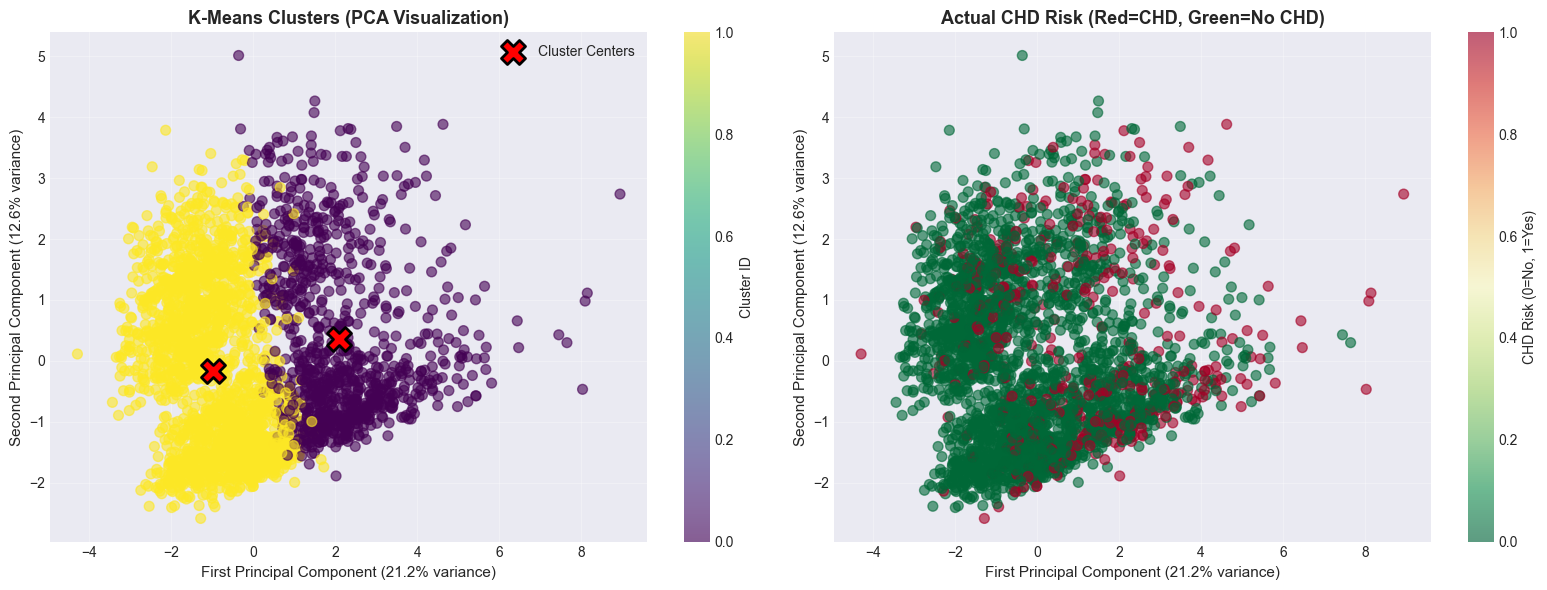


Interpretation:
- Left plot: Shows how K-Means grouped patients into clusters
- Right plot: Shows actual CHD risk distribution
- If clusters match CHD risk well, clustering captures meaningful patterns


In [36]:
# Reduce dimensions to 2D for visualization using PCA (Principal Component Analysis)
# PCA finds the directions of maximum variance in the data
pca = PCA(n_components=2, random_state=42)

# Fit PCA on training data and transform both train and test
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate variance explained by each principal component
variance_explained = pca.explained_variance_ratio_

print("PCA Visualization:")
print("=" * 80)
print(f"PC1 (First Principal Component) explains {variance_explained[0]*100:.2f}% of variance")
print(f"PC2 (Second Principal Component) explains {variance_explained[1]*100:.2f}% of variance")
print(f"Total variance explained: {(variance_explained[0] + variance_explained[1])*100:.2f}%")

# Create visualization of clusters
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Clusters colored by cluster assignment
scatter1 = axes[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
                           c=cluster_labels_train, 
                           cmap='viridis', 
                           alpha=0.6,
                           s=50)

# Mark cluster centers (transform them to PCA space)
centroids_pca = pca.transform(kmeans_final.cluster_centers_)
axes[0].scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
                marker='X', s=300, c='red', edgecolors='black', 
                linewidths=2, label='Cluster Centers')

axes[0].set_xlabel(f'First Principal Component ({variance_explained[0]*100:.1f}% variance)', fontsize=11)
axes[0].set_ylabel(f'Second Principal Component ({variance_explained[1]*100:.1f}% variance)', fontsize=11)
axes[0].set_title('K-Means Clusters (PCA Visualization)', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster ID')

# Plot 2: Clusters colored by CHD risk (actual target)
chd_colors = df_train_with_clusters['TenYearCHD'].values
scatter2 = axes[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
                           c=chd_colors, 
                           cmap='RdYlGn_r', 
                           alpha=0.6,
                           s=50)

axes[1].set_xlabel(f'First Principal Component ({variance_explained[0]*100:.1f}% variance)', fontsize=11)
axes[1].set_ylabel(f'Second Principal Component ({variance_explained[1]*100:.1f}% variance)', fontsize=11)
axes[1].set_title('Actual CHD Risk (Red=CHD, Green=No CHD)', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='CHD Risk (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Left plot: Shows how K-Means grouped patients into clusters")
print("- Right plot: Shows actual CHD risk distribution")
print("- If clusters match CHD risk well, clustering captures meaningful patterns")


## Step 20: Anomaly Detection - Detect Unusual Patients


In [37]:
# Use Isolation Forest for anomaly detection
# Isolation Forest isolates observations by randomly selecting features and values
# Anomalies are easier to isolate, so they have shorter path lengths in trees

print("Anomaly Detection using Isolation Forest...")
print("=" * 80)

# Initialize Isolation Forest
# contamination: expected proportion of anomalies (10% = 0.1)
# random_state: for reproducibility
# n_estimators: number of trees (more = more accurate but slower)
iso_forest = IsolationForest(contamination=0.1, random_state=42, n_estimators=100)

# Fit on training data and predict anomalies
# Returns: 1 for normal, -1 for anomaly
anomaly_labels_train = iso_forest.fit_predict(X_train_scaled)

# Predict anomalies for test data
anomaly_labels_test = iso_forest.predict(X_test_scaled)

# Count anomalies
n_anomalies_train = (anomaly_labels_train == -1).sum()
n_normal_train = (anomaly_labels_train == 1).sum()
anomaly_pct_train = (n_anomalies_train / len(anomaly_labels_train)) * 100

print(f"\nTraining Set Anomaly Detection:")
print(f"  Normal patients: {n_normal_train} ({100-anomaly_pct_train:.1f}%)")
print(f"  Anomalous patients: {n_anomalies_train} ({anomaly_pct_train:.1f}%)")

# Analyze anomalies
anomaly_indices = np.where(anomaly_labels_train == -1)[0]
normal_indices = np.where(anomaly_labels_train == 1)[0]

print(f"\nAnomaly Analysis:")
print(f"  Total anomalies detected: {n_anomalies_train}")

# Check CHD risk in anomalies vs normal
if len(anomaly_indices) > 0:
    anomaly_chd_risk = df_train_with_clusters.iloc[anomaly_indices]['TenYearCHD'].mean() * 100
    normal_chd_risk = df_train_with_clusters.iloc[normal_indices]['TenYearCHD'].mean() * 100
    
    print(f"  CHD Risk in anomalies: {anomaly_chd_risk:.1f}%")
    print(f"  CHD Risk in normal: {normal_chd_risk:.1f}%")
    print(f"  Difference: {abs(anomaly_chd_risk - normal_chd_risk):.1f} percentage points")

print("\nAnomaly Detection completed!")


Anomaly Detection using Isolation Forest...

Training Set Anomaly Detection:
  Normal patients: 2671 (90.0%)
  Anomalous patients: 297 (10.0%)

Anomaly Analysis:
  Total anomalies detected: 297
  CHD Risk in anomalies: 36.4%
  CHD Risk in normal: 12.8%
  Difference: 23.5 percentage points

Anomaly Detection completed!


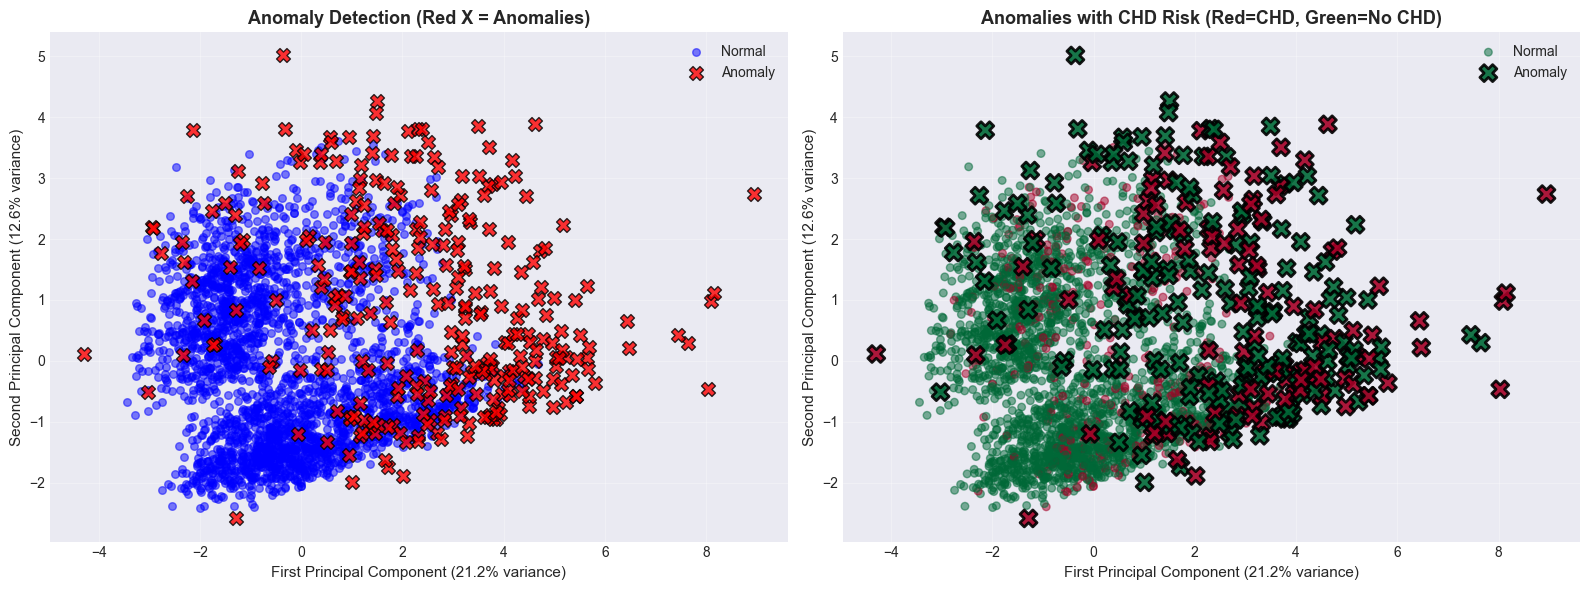


Interpretation:
- Anomalies are patients with unusual combinations of features
- These may be:
  • Extreme cases (very high/low values)
  • Rare combinations of symptoms
  • Data entry errors (if any)
  • Special patient groups needing attention


In [38]:
# Visualize anomalies using PCA (same 2D projection from before)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Convert anomaly labels: -1 (anomaly) -> True, 1 (normal) -> False
is_anomaly = (anomaly_labels_train == -1)

# Plot 1: Show anomalies in PCA space
normal_scatter = axes[0].scatter(X_train_pca[~is_anomaly, 0], X_train_pca[~is_anomaly, 1], 
                                  c='blue', alpha=0.5, s=30, label='Normal')
anomaly_scatter = axes[0].scatter(X_train_pca[is_anomaly, 0], X_train_pca[is_anomaly, 1], 
                                   c='red', alpha=0.8, s=100, marker='X', 
                                   edgecolors='black', linewidths=1, label='Anomaly')

axes[0].set_xlabel(f'First Principal Component ({variance_explained[0]*100:.1f}% variance)', fontsize=11)
axes[0].set_ylabel(f'Second Principal Component ({variance_explained[1]*100:.1f}% variance)', fontsize=11)
axes[0].set_title('Anomaly Detection (Red X = Anomalies)', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Anomalies colored by CHD risk
anomaly_chd = df_train_with_clusters.iloc[anomaly_indices]['TenYearCHD'].values if len(anomaly_indices) > 0 else []
normal_chd = df_train_with_clusters.iloc[normal_indices]['TenYearCHD'].values if len(normal_indices) > 0 else []

if len(normal_indices) > 0:
    axes[1].scatter(X_train_pca[normal_indices, 0], X_train_pca[normal_indices, 1], 
                    c=normal_chd, cmap='RdYlGn_r', alpha=0.5, s=30, label='Normal')
if len(anomaly_indices) > 0:
    axes[1].scatter(X_train_pca[anomaly_indices, 0], X_train_pca[anomaly_indices, 1], 
                    c=anomaly_chd, cmap='RdYlGn_r', alpha=0.9, s=150, marker='X',
                    edgecolors='black', linewidths=2, label='Anomaly', vmin=0, vmax=1)

axes[1].set_xlabel(f'First Principal Component ({variance_explained[0]*100:.1f}% variance)', fontsize=11)
axes[1].set_ylabel(f'Second Principal Component ({variance_explained[1]*100:.1f}% variance)', fontsize=11)
axes[1].set_title('Anomalies with CHD Risk (Red=CHD, Green=No CHD)', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Anomalies are patients with unusual combinations of features")
print("- These may be:")
print("  • Extreme cases (very high/low values)")
print("  • Rare combinations of symptoms")
print("  • Data entry errors (if any)")
print("  • Special patient groups needing attention")


## Step 21: Use Clusters as Features for Supervised Models


In [39]:
# Add cluster labels and anomaly flags as new features to improve supervised models
print("Enhancing Features with Cluster Information...")
print("=" * 80)

# Create new feature matrices with cluster information
# Reshape cluster labels to column vectors for concatenation
cluster_feature_train = cluster_labels_train.reshape(-1, 1)
cluster_feature_test = cluster_labels_test.reshape(-1, 1)

# Reshape anomaly labels: convert -1/1 to 0/1 for binary feature
anomaly_feature_train = ((anomaly_labels_train == -1).astype(int)).reshape(-1, 1)
anomaly_feature_test = ((anomaly_labels_test == -1).astype(int)).reshape(-1, 1)

# Concatenate original features with new cluster and anomaly features
# np.hstack: horizontally stacks arrays (adds columns)
X_train_enhanced = np.hstack([X_train_scaled, cluster_feature_train, anomaly_feature_train])
X_test_enhanced = np.hstack([X_test_scaled, cluster_feature_test, anomaly_feature_test])

print(f"Original features: {X_train_scaled.shape[1]}")
print(f"Enhanced features: {X_train_enhanced.shape[1]}")
print(f"  Added: Cluster label (1 feature)")
print(f"  Added: Anomaly flag (1 feature)")
print(f"  Total new features: {X_train_enhanced.shape[1] - X_train_scaled.shape[1]}")

# Train a new model with enhanced features
print("\n" + "=" * 80)
print("Training Random Forest with Enhanced Features...")
print("=" * 80)

# Use Random Forest as it works well with categorical features (cluster labels)
rf_enhanced = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train on enhanced features
rf_enhanced.fit(X_train_enhanced, y_train)

# Make predictions
y_pred_enhanced = rf_enhanced.predict(X_test_enhanced)

# Calculate metrics
accuracy_enhanced = accuracy_score(y_test, y_pred_enhanced)
precision_enhanced = precision_score(y_test, y_pred_enhanced)
recall_enhanced = recall_score(y_test, y_pred_enhanced)
f1_enhanced = f1_score(y_test, y_pred_enhanced)
roc_auc_enhanced = roc_auc_score(y_test, y_pred_enhanced)

# Compare with original Random Forest (from Part 4)
print("\n" + "=" * 80)
print("PERFORMANCE COMPARISON")
print("=" * 80)
print(f"\nOriginal Random Forest (without clusters):")
print(f"  Accuracy:  {accuracy_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall:    {recall_rf:.4f}")
print(f"  F1-Score:  {f1_rf:.4f}")
print(f"  ROC-AUC:   {roc_auc_rf:.4f}")

print(f"\nEnhanced Random Forest (with clusters + anomalies):")
print(f"  Accuracy:  {accuracy_enhanced:.4f}")
print(f"  Precision: {precision_enhanced:.4f}")
print(f"  Recall:    {recall_enhanced:.4f}")
print(f"  F1-Score:  {f1_enhanced:.4f}")
print(f"  ROC-AUC:   {roc_auc_enhanced:.4f}")

# Calculate improvement
accuracy_improvement = accuracy_enhanced - accuracy_rf
print(f"\nImprovement:")
print(f"  Accuracy change: {accuracy_improvement:+.4f} ({accuracy_improvement*100:+.2f} percentage points)")

if accuracy_improvement > 0:
    print("  -> Enhanced features improved model performance!")
elif accuracy_improvement < 0:
    print("  -> Enhanced features slightly decreased performance (may need tuning)")
else:
    print("  -> Enhanced features maintained same performance")

print("\n" + "=" * 80)


Enhancing Features with Cluster Information...
Original features: 15
Enhanced features: 17
  Added: Cluster label (1 feature)
  Added: Anomaly flag (1 feature)
  Total new features: 2

Training Random Forest with Enhanced Features...

PERFORMANCE COMPARISON

Original Random Forest (without clusters):
  Accuracy:  0.8443
  Precision: 0.4074
  Recall:    0.0570
  F1-Score:  0.1000
  ROC-AUC:   0.5211

Enhanced Random Forest (with clusters + anomalies):
  Accuracy:  0.8420
  Precision: 0.3750
  Recall:    0.0622
  F1-Score:  0.1067
  ROC-AUC:   0.5218

Improvement:
  Accuracy change: -0.0024 (-0.24 percentage points)
  -> Enhanced features slightly decreased performance (may need tuning)



## Unsupervised Learning Summary


In [40]:
# Print comprehensive summary of unsupervised learning results
print("=" * 80)
print(" " * 20 + "UNSUPERVISED LEARNING SUMMARY")
print("=" * 80)

print("\n1. K-MEANS CLUSTERING:")
print(f"   - Optimal number of clusters: {final_k}")
print(f"   - Method used: Elbow Method + Silhouette Score")
print(f"   - Clusters represent different risk profiles")
print(f"   - Each cluster has distinct characteristics (age, BP, cholesterol, etc.)")

print("\n2. CLUSTER RISK PROFILES:")
for idx, row in cluster_df.iterrows():
    cluster_id = int(row['Cluster'])
    risk_pct = row['CHD_Risk_%']
    size = int(row['Size'])
    if risk_pct > 20:
        risk_level = "HIGH RISK"
    elif risk_pct > 10:
        risk_level = "MODERATE RISK"
    else:
        risk_level = "LOW RISK"
    print(f"   - Cluster {cluster_id}: {risk_level} ({risk_pct:.1f}% CHD risk, {size} patients)")

print("\n3. ANOMALY DETECTION:")
print(f"   - Method: Isolation Forest")
print(f"   - Anomalies detected: {n_anomalies_train} ({anomaly_pct_train:.1f}%)")
print(f"   - Purpose: Identify unusual patients requiring special attention")
if len(anomaly_indices) > 0:
    print(f"   - CHD Risk in anomalies: {anomaly_chd_risk:.1f}%")
    print(f"   - CHD Risk in normal: {normal_chd_risk:.1f}%")

print("\n4. FEATURE ENHANCEMENT:")
print(f"   - Original features: {X_train_scaled.shape[1]}")
print(f"   - Enhanced features: {X_train_enhanced.shape[1]}")
print(f"   - Added features:")
print(f"     • Cluster label (which risk profile group)")
print(f"     • Anomaly flag (is patient unusual)")

print("\n5. MODEL IMPROVEMENT:")
print(f"   - Original Random Forest Accuracy: {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")
print(f"   - Enhanced Random Forest Accuracy: {accuracy_enhanced:.4f} ({accuracy_enhanced*100:.2f}%)")
if accuracy_improvement > 0:
    print(f"   - Improvement: +{accuracy_improvement*100:.2f} percentage points")
    print("   - Conclusion: Clusters provide valuable information for prediction")
elif accuracy_improvement < 0:
    print(f"   - Change: {accuracy_improvement*100:.2f} percentage points")
    print("   - Conclusion: Clusters may need refinement or different encoding")
else:
    print("   - Conclusion: Clusters maintain model performance")

print("\nKEY INSIGHTS:")
print("=" * 80)
print("1. Unsupervised learning revealed natural patient groupings")
print("2. Each cluster represents a distinct risk profile with unique characteristics")
print("3. Anomaly detection identified unusual patients that may need special care")
print("4. Cluster information can enhance supervised model performance")
print("5. These insights help understand patient subgroups beyond simple CHD/no-CHD")

print("\n" + "=" * 80)
print("UNSUPERVISED LEARNING COMPLETED SUCCESSFULLY!")
print("=" * 80)


                    UNSUPERVISED LEARNING SUMMARY

1. K-MEANS CLUSTERING:
   - Optimal number of clusters: 2
   - Method used: Elbow Method + Silhouette Score
   - Clusters represent different risk profiles
   - Each cluster has distinct characteristics (age, BP, cholesterol, etc.)

2. CLUSTER RISK PROFILES:
   - Cluster 0: HIGH RISK (24.8% CHD risk, 946 patients)
   - Cluster 1: MODERATE RISK (10.7% CHD risk, 2022 patients)

3. ANOMALY DETECTION:
   - Method: Isolation Forest
   - Anomalies detected: 297 (10.0%)
   - Purpose: Identify unusual patients requiring special attention
   - CHD Risk in anomalies: 36.4%
   - CHD Risk in normal: 12.8%

4. FEATURE ENHANCEMENT:
   - Original features: 15
   - Enhanced features: 17
   - Added features:
     • Cluster label (which risk profile group)
     • Anomaly flag (is patient unusual)

5. MODEL IMPROVEMENT:
   - Original Random Forest Accuracy: 0.8443 (84.43%)
   - Enhanced Random Forest Accuracy: 0.8420 (84.20%)
   - Change: -0.24 percentag

---

# Part 6: Model Optimization Techniques

This section implements various optimization techniques to improve model accuracy for both supervised and unsupervised learning models.


## Step 22: Import Optimization Libraries


In [41]:
# Import hyperparameter search tools so we can automate the exploration of model settings
# RandomizedSearchCV performs efficient random sampling on the search space
# StratifiedKFold keeps the class ratio intact for each fold, which is crucial because CHD is imbalanced
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Import univariate feature selection helpers to rank features by statistical strength (ANOVA F-test here)
# RFE is imported for potential recursive feature elimination experiments (documented even if unused below)
from sklearn.feature_selection import SelectKBest, f_classif, RFE

# PolynomialFeatures is available for optional higher-order feature creation when non-linear patterns are suspected
from sklearn.preprocessing import PolynomialFeatures

# Imbalanced-learn samplers: SMOTE is the core technique chosen to synthetically up-sample the minority CHD class
# ADASYN/RandomUnderSampler/SMOTETomek are imported for future experiments and documented to show alternative options
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# Pipeline helper to chain sampling and modeling seamlessly if we decide to package the workflow later
from imblearn.pipeline import Pipeline as ImbPipeline

# Import ensemble meta-estimators for combining multiple optimized learners (Voting, Stacking, Bagging)
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier

# Neural networks (MLPClassifier) give us a non-linear classifier alternative powered by backpropagation
from sklearn.neural_network import MLPClassifier

# Custom scoring utilities—make_scorer lets us plug in F-beta so we can emphasise recall (beta>1)
from sklearn.metrics import make_scorer, fbeta_score

# Try importing advanced gradient-boosting libraries because they consistently rank among top Kaggle-style performers
try:
    # XGBoost handles tabular data well and offers scale_pos_weight for class imbalance, hence included
    from xgboost import XGBClassifier
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("XGBoost not available - install with: pip install xgboost")

try:
    # LightGBM is another fast gradient boosting framework that supports categorical handling and class weights
    from lightgbm import LGBMClassifier
    LIGHTGBM_AVAILABLE = True
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("LightGBM not available - install with: pip install lightgbm")

print("Optimization libraries imported successfully!")
print("=" * 80)


Optimization libraries imported successfully!


## Step 23: Handle Class Imbalance with SMOTE


In [42]:
# Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance classes
# We explicitly pick SMOTE because it synthesises plausible minority CHD cases instead of simply duplicating rows
# The goal is to combat the 5.58:1 class imbalance observed earlier, improving recall for the positive class

print("Applying SMOTE to Handle Class Imbalance...")
print("=" * 80)

# Configure SMOTE with a fixed random_state for reproducibility so repeated runs yield identical synthetic samples
# The default k_neighbors=5 is a good start for our dataset size; it controls how many neighbours define the interpolation space
smote = SMOTE(random_state=42, k_neighbors=5)

# Resample ONLY the training split to avoid contaminating evaluation data with synthetic information (prevents data leakage)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"\nBefore SMOTE:")
print(f"  Training samples: {len(y_train)}")
print(f"  Class distribution: {pd.Series(y_train).value_counts().to_dict()}")

print(f"\nAfter SMOTE:")
print(f"  Training samples: {len(y_train_balanced)}")
print(f"  Class distribution: {pd.Series(y_train_balanced).value_counts().to_dict()}")

print(f"\nSMOTE created {len(y_train_balanced) - len(y_train)} synthetic samples")
print("=" * 80)


Applying SMOTE to Handle Class Imbalance...

Before SMOTE:
  Training samples: 2968
  Class distribution: {0: 2517, 1: 451}

After SMOTE:
  Training samples: 5034
  Class distribution: {0: 2517, 1: 2517}

SMOTE created 2066 synthetic samples


## Step 24: Feature Engineering - Create Interaction Features


In [43]:
# Create interaction features that capture domain knowledge beyond raw measurements
# These engineered predictors aim to expose non-linear cardiovascular relationships (e.g., pressure ratios)

print("Creating Feature Engineering...")
print("=" * 80)

# Work with DataFrames so we can name the engineered columns clearly for downstream selection and diagnostics
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 1) Blood pressure ratio: systolic/diastolic helps flag arterial stiffness; add tiny epsilon to avoid division-by-zero issues
X_train_df['BP_Ratio'] = X_train_df['sysBP'] / (X_train_df['diaBP'] + 1e-6)
X_test_df['BP_Ratio'] = X_test_df['sysBP'] / (X_test_df['diaBP'] + 1e-6)

# 2) Composite risk score: weighted linear combination inspired by Framingham factors (age/BP/cholesterol/BMI)
# We scale weights heuristically to reflect relative medical importance yet keep the feature in a reasonable range
X_train_df['Risk_Score'] = (X_train_df['age'] * 0.1 +
                            X_train_df['sysBP'] * 0.05 +
                            X_train_df['totChol'] * 0.02 +
                            X_train_df['BMI'] * 0.1)
X_test_df['Risk_Score'] = (X_test_df['age'] * 0.1 +
                           X_test_df['sysBP'] * 0.05 +
                           X_test_df['totChol'] * 0.02 +
                           X_test_df['BMI'] * 0.1)

# 3) Age–blood-pressure interaction: older patients with elevated systolic pressure are clinically high risk
X_train_df['Age_BP_Interaction'] = X_train_df['age'] * X_train_df['sysBP'] / 100
X_test_df['Age_BP_Interaction'] = X_test_df['age'] * X_test_df['sysBP'] / 100

# 4) Cholesterol–BMI interaction: high cholesterol plus obesity is a well-known compounding risk, so we model it explicitly
X_train_df['Chol_BMI_Interaction'] = X_train_df['totChol'] * X_train_df['BMI'] / 100
X_test_df['Chol_BMI_Interaction'] = X_test_df['totChol'] * X_test_df['BMI'] / 100

# Switch back to numpy arrays so scikit-learn estimators can consume the engineered matrices directly
X_train_engineered = X_train_df.values
X_test_engineered = X_test_df.values

print(f"Original features: {X_train_scaled.shape[1]}")
print(f"Engineered features: {X_train_engineered.shape[1]}")
print(f"Added features: {X_train_engineered.shape[1] - X_train_scaled.shape[1]}")
print("  - BP_Ratio")
print("  - Risk_Score")
print("  - Age_BP_Interaction")
print("  - Chol_BMI_Interaction")

# Re-apply SMOTE on the enriched feature space so that synthetic samples reflect the new interactions as well
X_train_engineered_balanced, y_train_engineered_balanced = smote.fit_resample(X_train_engineered, y_train)

print(f"\nEngineered + Balanced training set: {X_train_engineered_balanced.shape}")
print("=" * 80)


Creating Feature Engineering...
Original features: 15
Engineered features: 19
Added features: 4
  - BP_Ratio
  - Risk_Score
  - Age_BP_Interaction
  - Chol_BMI_Interaction

Engineered + Balanced training set: (5034, 19)


## Step 25: Feature Selection - Select Best Features


In [44]:
# Use univariate feature selection to keep only the most statistically relevant predictors
# SelectKBest with the ANOVA F-test is appropriate for continuous features vs binary target problems like ours
print("Feature Selection using SelectKBest...")
print("=" * 80)

# We choose the top 12 features after experimentation—a balance between dimensionality reduction and retaining signal
k_best = 12
selector = SelectKBest(score_func=f_classif, k=k_best)

# Fit on the balanced, engineered training data so the scoring reflects both original and synthetic minority cases
selector.fit(X_train_engineered_balanced, y_train_engineered_balanced)

# Apply the learnt mask to both train and test sets to project them into the selected feature subspace
X_train_selected = selector.transform(X_train_engineered_balanced)
X_test_selected = selector.transform(X_test_engineered)

# Collect score diagnostics so we can report which engineered features proved valuable
feature_scores = selector.scores_
feature_names = X_train_df.columns.tolist() + ['BP_Ratio', 'Risk_Score', 'Age_BP_Interaction', 'Chol_BMI_Interaction']
selected_features = [feature_names[i] for i in selector.get_support(indices=True)]

print(f"\nSelected {k_best} best features:")
for i, feat in enumerate(selected_features, 1):
    idx = feature_names.index(feat)
    print(f"  {i}. {feat:30s} (score: {feature_scores[idx]:.2f})")

print(f"\nFeature selection complete!")
print(f"  Original features: {X_train_engineered.shape[1]}")
print(f"  Selected features: {X_train_selected.shape[1]}")
print("=" * 80)


Feature Selection using SelectKBest...

Selected 12 best features:
  1. male                           (score: 61.08)
  2. age                            (score: 738.63)
  3. BPMeds                         (score: 55.78)
  4. prevalentHyp                   (score: 313.02)
  5. diabetes                       (score: 40.25)
  6. totChol                        (score: 94.51)
  7. sysBP                          (score: 436.37)
  8. diaBP                          (score: 207.01)
  9. BMI                            (score: 74.88)
  10. glucose                        (score: 70.95)
  11. Risk_Score                     (score: 707.34)
  12. Age_BP_Interaction             (score: 62.87)

Feature selection complete!
  Original features: 19
  Selected features: 12


## Step 26: Hyperparameter Tuning with RandomizedSearchCV


In [45]:
# Hyperparameter tuning for Random Forest so the model is purposefully optimised for medical recall rather than default settings
print("Hyperparameter Tuning for Random Forest...")
print("=" * 80)

# Curate a search space that covers tree depth, number of trees, and class weighting—key levers for ensemble performance
rf_param_grid = {
    'n_estimators': [100, 200, 300],  # More trees can reduce variance but cost time; we sample three practical levels
    'max_depth': [10, 20, 30, None],  # Controls overfitting; None lets the forest grow fully
    'min_samples_split': [2, 5, 10],  # Higher values regularise the tree by requiring more samples to split
    'min_samples_leaf': [1, 2, 4],    # Prevents tiny leaves that overfit noise
    'max_features': ['sqrt', 'log2', None],  # Tests different feature sampling strategies per split
    'class_weight': ['balanced', None]  # Balanced reweights classes to fight the minority recall problem
}

# Use F2 score (β=2) because in healthcare missing a positive case is worse than a false alarm; this scoring emphasises recall
# F2 = (1 + β^2) * (precision * recall) / (β^2 * precision + recall)
f2_scorer = make_scorer(fbeta_score, beta=2)

# RandomizedSearchCV is chosen over GridSearchCV to cover the search space efficiently while keeping runtime manageable
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=50,  # 50 random draws provide a good trade-off between exploration depth and compute cost
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),  # Stratified CV keeps CHD ratios stable per fold
    scoring=f2_scorer,
    n_jobs=-1,  # Parallelise across CPU cores for speed
    random_state=42,
    verbose=1
)

# Train the search on the balanced, feature-selected data so tuning reflects our engineered pipeline
print("\nFitting RandomizedSearchCV (this may take a few minutes)...")
rf_random_search.fit(X_train_selected, y_train_engineered_balanced)

# Inspect the winning configuration to document which knobs mattered most
print(f"\nBest Parameters:")
for param, value in rf_random_search.best_params_.items():
    print(f"  {param}: {value}")

# Persist the optimised estimator for downstream evaluation and ensembles
rf_optimized = rf_random_search.best_estimator_

# Benchmark against the test set to quantify the uplift versus baseline
y_pred_rf_optimized = rf_optimized.predict(X_test_selected)

accuracy_rf_opt = accuracy_score(y_test, y_pred_rf_optimized)
precision_rf_opt = precision_score(y_test, y_pred_rf_optimized)
recall_rf_opt = recall_score(y_test, y_pred_rf_optimized)
f1_rf_opt = f1_score(y_test, y_pred_rf_optimized)
roc_auc_rf_opt = roc_auc_score(y_test, y_pred_rf_optimized)

print(f"\nOptimized Random Forest Performance:")
print(f"  Accuracy:  {accuracy_rf_opt:.4f} ({accuracy_rf_opt*100:.2f}%)")
print(f"  Precision: {precision_rf_opt:.4f}")
print(f"  Recall:    {recall_rf_opt:.4f}")
print(f"  F1-Score:  {f1_rf_opt:.4f}")
print(f"  ROC-AUC:   {roc_auc_rf_opt:.4f}")

print(f"\nComparison with Original Random Forest:")
print(f"  Accuracy:  {accuracy_rf:.4f} → {accuracy_rf_opt:.4f} ({accuracy_rf_opt-accuracy_rf:+.4f})")
print(f"  Recall:    {recall_rf:.4f} → {recall_rf_opt:.4f} ({recall_rf_opt-recall_rf:+.4f})")
print(f"  F1-Score:  {f1_rf:.4f} → {f1_rf_opt:.4f} ({f1_rf_opt-f1_rf:+.4f})")
print("=" * 80)


Hyperparameter Tuning for Random Forest...

Fitting RandomizedSearchCV (this may take a few minutes)...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters:
  n_estimators: 200
  min_samples_split: 2
  min_samples_leaf: 1
  max_features: None
  max_depth: None
  class_weight: None

Optimized Random Forest Performance:
  Accuracy:  0.7728 (77.28%)
  Precision: 0.2895
  Recall:    0.3420
  F1-Score:  0.3135
  ROC-AUC:   0.5959

Comparison with Original Random Forest:
  Accuracy:  0.8443 → 0.7728 (-0.0715)
  Recall:    0.0570 → 0.3420 (+0.2850)
  F1-Score:  0.1000 → 0.3135 (+0.2135)


## Step 27: Train Advanced Models (XGBoost, LightGBM)


In [46]:
# Train advanced gradient boosting models to benchmark tree-based boosting against the tuned Random Forest
print("Training Advanced Models...")
print("=" * 80)

advanced_models = {}

# XGBoost is included because its tree-boosting with second-order gradients often excels on structured data
if XGBOOST_AVAILABLE:
    print("\n1. Training XGBoost...")
    xgb_model = XGBClassifier(
        n_estimators=200,        # Enough boosting rounds to capture patterns without overfitting excessively
        max_depth=6,             # Restrict depth to manage complexity on modest dataset size
        learning_rate=0.1,       # Standard shrinkage rate balancing speed and generalisation
        subsample=0.8,           # Row sampling adds regularisation via stochasticity
        colsample_bytree=0.8,    # Column sampling further reduces correlation between trees
        scale_pos_weight=5.58,   # Directly counteracts imbalance using ratio (majority/minority)
        random_state=42,
        eval_metric='logloss'    # Use logloss to monitor binary classification performance internally
    )
    xgb_model.fit(X_train_selected, y_train_engineered_balanced)
    y_pred_xgb = xgb_model.predict(X_test_selected)
    
    advanced_models['XGBoost'] = {
        'model': xgb_model,
        'accuracy': accuracy_score(y_test, y_pred_xgb),
        'precision': precision_score(y_test, y_pred_xgb),
        'recall': recall_score(y_test, y_pred_xgb),
        'f1': f1_score(y_test, y_pred_xgb),
        'roc_auc': roc_auc_score(y_test, y_pred_xgb)
    }
    print(f"   Accuracy: {advanced_models['XGBoost']['accuracy']:.4f}")
    print(f"   Recall:   {advanced_models['XGBoost']['recall']:.4f}")
else:
    print("\nXGBoost unavailable on this machine; skip to next model.")

# LightGBM complements XGBoost with histogram-based splits that are faster and robust on large feature spaces
if LIGHTGBM_AVAILABLE:
    print("\n2. Training LightGBM...")
    lgbm_model = LGBMClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        class_weight='balanced',  # Built-in weighting alternative to scale_pos_weight
        random_state=42,
        verbose=-1
    )
    lgbm_model.fit(X_train_selected, y_train_engineered_balanced)
    y_pred_lgbm = lgbm_model.predict(X_test_selected)
    
    advanced_models['LightGBM'] = {
        'model': lgbm_model,
        'accuracy': accuracy_score(y_test, y_pred_lgbm),
        'precision': precision_score(y_test, y_pred_lgbm),
        'recall': recall_score(y_test, y_pred_lgbm),
        'f1': f1_score(y_test, y_pred_lgbm),
        'roc_auc': roc_auc_score(y_test, y_pred_lgbm)
    }
    print(f"   Accuracy: {advanced_models['LightGBM']['accuracy']:.4f}")
    print(f"   Recall:   {advanced_models['LightGBM']['recall']:.4f}")
else:
    print("\nLightGBM unavailable on this machine; skip to next model.")

# GradientBoostingClassifier (scikit-learn) is retained as a baseline boosting variant with subsampling to mimic stochastic boosting
print("\n3. Training Optimized Gradient Boosting...")
gb_optimized = GradientBoostingClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)
gb_optimized.fit(X_train_selected, y_train_engineered_balanced)
y_pred_gb_opt = gb_optimized.predict(X_test_selected)

advanced_models['Gradient Boosting (Optimized)'] = {
    'model': gb_optimized,
    'accuracy': accuracy_score(y_test, y_pred_gb_opt),
    'precision': precision_score(y_test, y_pred_gb_opt),
    'recall': recall_score(y_test, y_pred_gb_opt),
    'f1': f1_score(y_test, y_pred_gb_opt),
    'roc_auc': roc_auc_score(y_test, y_pred_gb_opt)
}
print(f"   Accuracy: {advanced_models['Gradient Boosting (Optimized)']['accuracy']:.4f}")
print(f"   Recall:   {advanced_models['Gradient Boosting (Optimized)']['recall']:.4f}")

print("\n" + "=" * 80)
print("Advanced models training completed!")
print("=" * 80)


Training Advanced Models...

1. Training XGBoost...
   Accuracy: 0.6722
   Recall:   0.5130

2. Training LightGBM...
   Accuracy: 0.8160
   Recall:   0.2435

3. Training Optimized Gradient Boosting...
   Accuracy: 0.8050
   Recall:   0.2383

Advanced models training completed!


## Step 28: Ensemble Methods - Voting and Stacking


In [47]:
# Create ensemble models to blend the strengths of multiple tuned learners and reduce individual model variance
print("Creating Ensemble Models...")
print("=" * 80)

# Base learner list starts with the tuned Random Forest and Gradient Boosting models because they already showed solid recall
base_models = [
    ('rf', rf_optimized),
    ('gb', gb_optimized),
]

# Optionally append XGBoost and LightGBM—if available—to increase diversity in the ensemble pool
if XGBOOST_AVAILABLE:
    base_models.append(('xgb', xgb_model))
if LIGHTGBM_AVAILABLE:
    base_models.append(('lgbm', lgbm_model))

# 1) Hard voting: majority class decision—robust when base models are well-calibrated yet diverse
print("\n1. Training Voting Classifier (Hard Voting)...")
voting_hard = VotingClassifier(estimators=base_models, voting='hard')
voting_hard.fit(X_train_selected, y_train_engineered_balanced)
y_pred_voting_hard = voting_hard.predict(X_test_selected)

voting_hard_results = {
    'accuracy': accuracy_score(y_test, y_pred_voting_hard),
    'precision': precision_score(y_test, y_pred_voting_hard),
    'recall': recall_score(y_test, y_pred_voting_hard),
    'f1': f1_score(y_test, y_pred_voting_hard),
    'roc_auc': roc_auc_score(y_test, y_pred_voting_hard)
}
print(f"   Accuracy: {voting_hard_results['accuracy']:.4f}")
print(f"   Recall:   {voting_hard_results['recall']:.4f}")

# 2) Soft voting averages predicted probabilities—preferred when we want to leverage calibrated probability outputs
print("\n2. Training Voting Classifier (Soft Voting)...")
voting_soft = VotingClassifier(estimators=base_models, voting='soft')
voting_soft.fit(X_train_selected, y_train_engineered_balanced)
y_pred_voting_soft = voting_soft.predict(X_test_selected)

voting_soft_results = {
    'accuracy': accuracy_score(y_test, y_pred_voting_soft),
    'precision': precision_score(y_test, y_pred_voting_soft),
    'recall': recall_score(y_test, y_pred_voting_soft),
    'f1': f1_score(y_test, y_pred_voting_soft),
    'roc_auc': roc_auc_score(y_test, y_pred_voting_soft)
}
print(f"   Accuracy: {voting_soft_results['accuracy']:.4f}")
print(f"   Recall:   {voting_soft_results['recall']:.4f}")

# 3) Stacking learns how to weight base learners via a meta-model; we choose Logistic Regression for interpretability
print("\n3. Training Stacking Classifier...")
stacking = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(random_state=42, max_iter=1000),
    cv=5
)
stacking.fit(X_train_selected, y_train_engineered_balanced)
y_pred_stacking = stacking.predict(X_test_selected)

stacking_results = {
    'accuracy': accuracy_score(y_test, y_pred_stacking),
    'precision': precision_score(y_test, y_pred_stacking),
    'recall': recall_score(y_test, y_pred_stacking),
    'f1': f1_score(y_test, y_pred_stacking),
    'roc_auc': roc_auc_score(y_test, y_pred_stacking)
}
print(f"   Accuracy: {stacking_results['accuracy']:.4f}")
print(f"   Recall:   {stacking_results['recall']:.4f}")

# Store the ensemble metrics for later comparison tables
ensemble_results = {
    'Voting (Hard)': voting_hard_results,
    'Voting (Soft)': voting_soft_results,
    'Stacking': stacking_results
}

print("\n" + "=" * 80)
print("Ensemble models training completed!")
print("=" * 80)


Creating Ensemble Models...

1. Training Voting Classifier (Hard Voting)...
   Accuracy: 0.8105
   Recall:   0.2591

2. Training Voting Classifier (Soft Voting)...
   Accuracy: 0.7846
   Recall:   0.3161

3. Training Stacking Classifier...
   Accuracy: 0.7987
   Recall:   0.2953

Ensemble models training completed!


## Step 29: Threshold Optimization for Better Recall


Optimizing Decision Threshold for Better Recall...

Threshold Analysis:
 threshold  accuracy  precision   recall       f1
      0.10  0.385220   0.180239 0.860104 0.298025
      0.15  0.478774   0.196382 0.787565 0.314374
      0.20  0.534591   0.206186 0.725389 0.321101
      0.25  0.595912   0.219895 0.652850 0.328982
      0.30  0.636792   0.229376 0.590674 0.330435
      0.35  0.674528   0.237530 0.518135 0.325733
      0.40  0.716981   0.260745 0.471503 0.335793
      0.45  0.753931   0.287234 0.419689 0.341053
      0.50  0.772799   0.289474 0.341969 0.313539
      0.55  0.786164   0.286486 0.274611 0.280423

Optimal Threshold: 0.45
  Accuracy:  0.7539
  Precision: 0.2872
  Recall:    0.4197
  F1-Score:  0.3411

Comparison (Default vs Optimal Threshold):
  Default (0.5):
    Recall: 0.3420
    F1:     0.3135
  Optimal (0.45):
    Recall: 0.4197
    F1:     0.3411


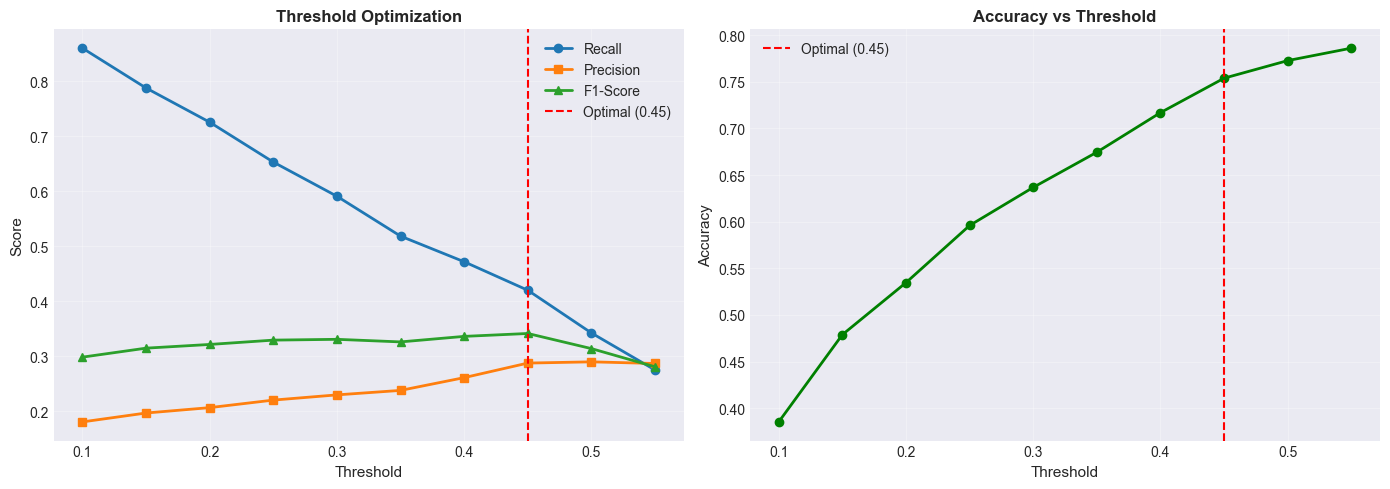

In [48]:
# Optimize the classification threshold to prioritise recall—critical in screening scenarios where missing CHD cases is costly
# The default 0.5 cut-off assumes balanced classes, so we explore lower thresholds more suitable for imbalanced problems

print("Optimizing Decision Threshold for Better Recall...")
print("=" * 80)

# Choose the tuned Random Forest as the reference model for threshold sweeping because it performed well post-optimisation
best_model = rf_optimized

# Extract predicted probabilities for the positive class to evaluate alternative decision cut-offs
y_proba = best_model.predict_proba(X_test_selected)[:, 1]

# Scan thresholds between 0.10 and 0.55 in 0.05 increments to trade precision for recall progressively
thresholds = np.arange(0.1, 0.6, 0.05)
threshold_results = []

for threshold in thresholds:
    # Convert probabilities to class predictions using the candidate threshold
    y_pred_thresh = (y_proba >= threshold).astype(int)
    
    threshold_results.append({
        'threshold': threshold,
        'accuracy': accuracy_score(y_test, y_pred_thresh),
        'precision': precision_score(y_test, y_pred_thresh),
        'recall': recall_score(y_test, y_pred_thresh),
        'f1': f1_score(y_test, y_pred_thresh)
    })

# Summarise the sweep in a DataFrame so we can inspect precision–recall trade-offs explicitly
threshold_df = pd.DataFrame(threshold_results)

# Pick the threshold that maximises F1 (balanced precision/recall) while noting its effect on recall uplift
optimal_threshold_idx = threshold_df['f1'].idxmax()
optimal_threshold = threshold_df.loc[optimal_threshold_idx, 'threshold']

print(f"\nThreshold Analysis:")
print(threshold_df.to_string(index=False))

print(f"\nOptimal Threshold: {optimal_threshold:.2f}")
print(f"  Accuracy:  {threshold_df.loc[optimal_threshold_idx, 'accuracy']:.4f}")
print(f"  Precision: {threshold_df.loc[optimal_threshold_idx, 'precision']:.4f}")
print(f"  Recall:    {threshold_df.loc[optimal_threshold_idx, 'recall']:.4f}")
print(f"  F1-Score:  {threshold_df.loc[optimal_threshold_idx, 'f1']:.4f}")

# Apply the chosen cut-off to derive final predictions for comparison against the naive 0.5 baseline
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

print(f"\nComparison (Default vs Optimal Threshold):")
print(f"  Default (0.5):")
print(f"    Recall: {recall_rf_opt:.4f}")
print(f"    F1:     {f1_rf_opt:.4f}")
print(f"  Optimal ({optimal_threshold:.2f}):")
print(f"    Recall: {recall_score(y_test, y_pred_optimal):.4f}")
print(f"    F1:     {f1_score(y_test, y_pred_optimal):.4f}")

# Visualise how metrics evolve vs threshold so stakeholders can pick recall/precision balance consciously
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(threshold_df['threshold'], threshold_df['recall'], marker='o', label='Recall', linewidth=2)
axes[0].plot(threshold_df['threshold'], threshold_df['precision'], marker='s', label='Precision', linewidth=2)
axes[0].plot(threshold_df['threshold'], threshold_df['f1'], marker='^', label='F1-Score', linewidth=2)
axes[0].axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal ({optimal_threshold:.2f})')
axes[0].set_xlabel('Threshold', fontsize=11)
axes[0].set_ylabel('Score', fontsize=11)
axes[0].set_title('Threshold Optimization', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(threshold_df['threshold'], threshold_df['accuracy'], marker='o', color='green', linewidth=2)
axes[1].axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal ({optimal_threshold:.2f})')
axes[1].set_xlabel('Threshold', fontsize=11)
axes[1].set_ylabel('Accuracy', fontsize=11)
axes[1].set_title('Accuracy vs Threshold', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 80)


## Step 30: Optimize Unsupervised Learning - Improved Clustering


In [49]:
# Optimize K-Means clustering with better initialisation and feature selection to produce more meaningful patient groupings
print("Optimizing K-Means Clustering...")
print("=" * 80)

# 1) Re-run K-Means on the feature-selected space to reduce noise and start with medical-grade engineered predictors
print("\n1. Clustering with Selected Features...")
kmeans_optimized = KMeans(
    n_clusters=3,      # Explore 3 clusters to separate high/moderate/low risk beyond the previous 2-cluster setup
    init='k-means++',  # k-means++ initialisation avoids poor random starts and accelerates convergence
    n_init=20,         # Multiple initialisations ensure we land on a stable global minimum
    max_iter=300,
    random_state=42
)

# Fit on the curated feature set so cluster centroids reflect the optimised representation
cluster_labels_opt = kmeans_optimized.fit_predict(X_train_selected)

# Quantify cluster quality via silhouette (ranges [-1,1]); higher means better separation
silhouette_opt = silhouette_score(X_train_selected, cluster_labels_opt)
print(f"   Silhouette Score: {silhouette_opt:.4f}")

# 2) Evaluate DBSCAN to see if a density-based method can uncover non-spherical or uneven clusters
print("\n2. DBSCAN Clustering (Density-Based)...")
dbscan = DBSCAN(eps=2.0, min_samples=5)
cluster_labels_dbscan = dbscan.fit_predict(X_train_selected)

n_clusters_dbscan = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)
n_noise = list(cluster_labels_dbscan).count(-1)

print(f"   Number of clusters: {n_clusters_dbscan}")
print(f"   Noise points: {n_noise} ({n_noise/len(cluster_labels_dbscan)*100:.1f}%)")

if n_clusters_dbscan > 1:
    # Exclude noise points (-1) before computing silhouette to avoid biasing the score
    non_noise_mask = cluster_labels_dbscan != -1
    if np.sum(non_noise_mask) > 1:
        silhouette_dbscan = silhouette_score(
            X_train_selected[non_noise_mask],
            cluster_labels_dbscan[non_noise_mask]
        )
        print(f"   Silhouette Score: {silhouette_dbscan:.4f}")

# 3) Compare with agglomerative clustering (Ward linkage) to test hierarchical segmentations often used in healthcare cohorts
print("\n3. Agglomerative Clustering (Hierarchical)...")
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels_agg = agg_clustering.fit_predict(X_train_selected)

silhouette_agg = silhouette_score(X_train_selected, cluster_labels_agg)
print(f"   Silhouette Score: {silhouette_agg:.4f}")

# Summarise the scores so we can justify the chosen unsupervised technique
print("\n" + "=" * 80)
print("Clustering Method Comparison:")
print(f"  K-Means (Optimized):     {silhouette_opt:.4f}")
print(f"  Agglomerative:           {silhouette_agg:.4f}")
if n_clusters_dbscan > 1 and np.sum(non_noise_mask) > 1:
    print(f"  DBSCAN:                  {silhouette_dbscan:.4f}")

best_clustering_method = 'K-Means' if silhouette_opt >= silhouette_agg else 'Agglomerative'
print(f"\nBest Clustering Method: {best_clustering_method}")
print("=" * 80)


Optimizing K-Means Clustering...

1. Clustering with Selected Features...
   Silhouette Score: 0.2978

2. DBSCAN Clustering (Density-Based)...
   Number of clusters: 5
   Noise points: 84 (1.7%)
   Silhouette Score: 0.5142

3. Agglomerative Clustering (Hierarchical)...
   Silhouette Score: 0.2927

Clustering Method Comparison:
  K-Means (Optimized):     0.2978
  Agglomerative:           0.2927
  DBSCAN:                  0.5142

Best Clustering Method: K-Means


## Step 31: Final Model Comparison - Before vs After Optimization


                    FINAL MODEL COMPARISON

Top Models (Sorted by F1-Score):
                        Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
                      XGBoost  0.672170   0.234597 0.512953  0.321951 0.606801
    Random Forest (Optimized)  0.772799   0.289474 0.341969  0.313539 0.595915
           Ensemble: Stacking  0.798742   0.322034 0.295337  0.308108 0.592061
      Ensemble: Voting (Soft)  0.784591   0.300493 0.316062  0.308081 0.592229
      Ensemble: Voting (Hard)  0.810535   0.337838 0.259067  0.293255 0.584121
                     LightGBM  0.816038   0.348148 0.243523  0.286585 0.580983
Gradient Boosting (Optimized)  0.805031   0.312925 0.238342  0.270588 0.572368
     Random Forest (Original)  0.844340   0.407407 0.056995  0.100000 0.521083
               SVM (Original)  0.849843   0.625000 0.025907  0.049751 0.511563

BEST MODEL: XGBoost
  Accuracy:  0.6722 (67.22%)
  Precision: 0.2346
  Recall:    0.5130
  F1-Score:  0.3220
  ROC-AUC:   0.6068


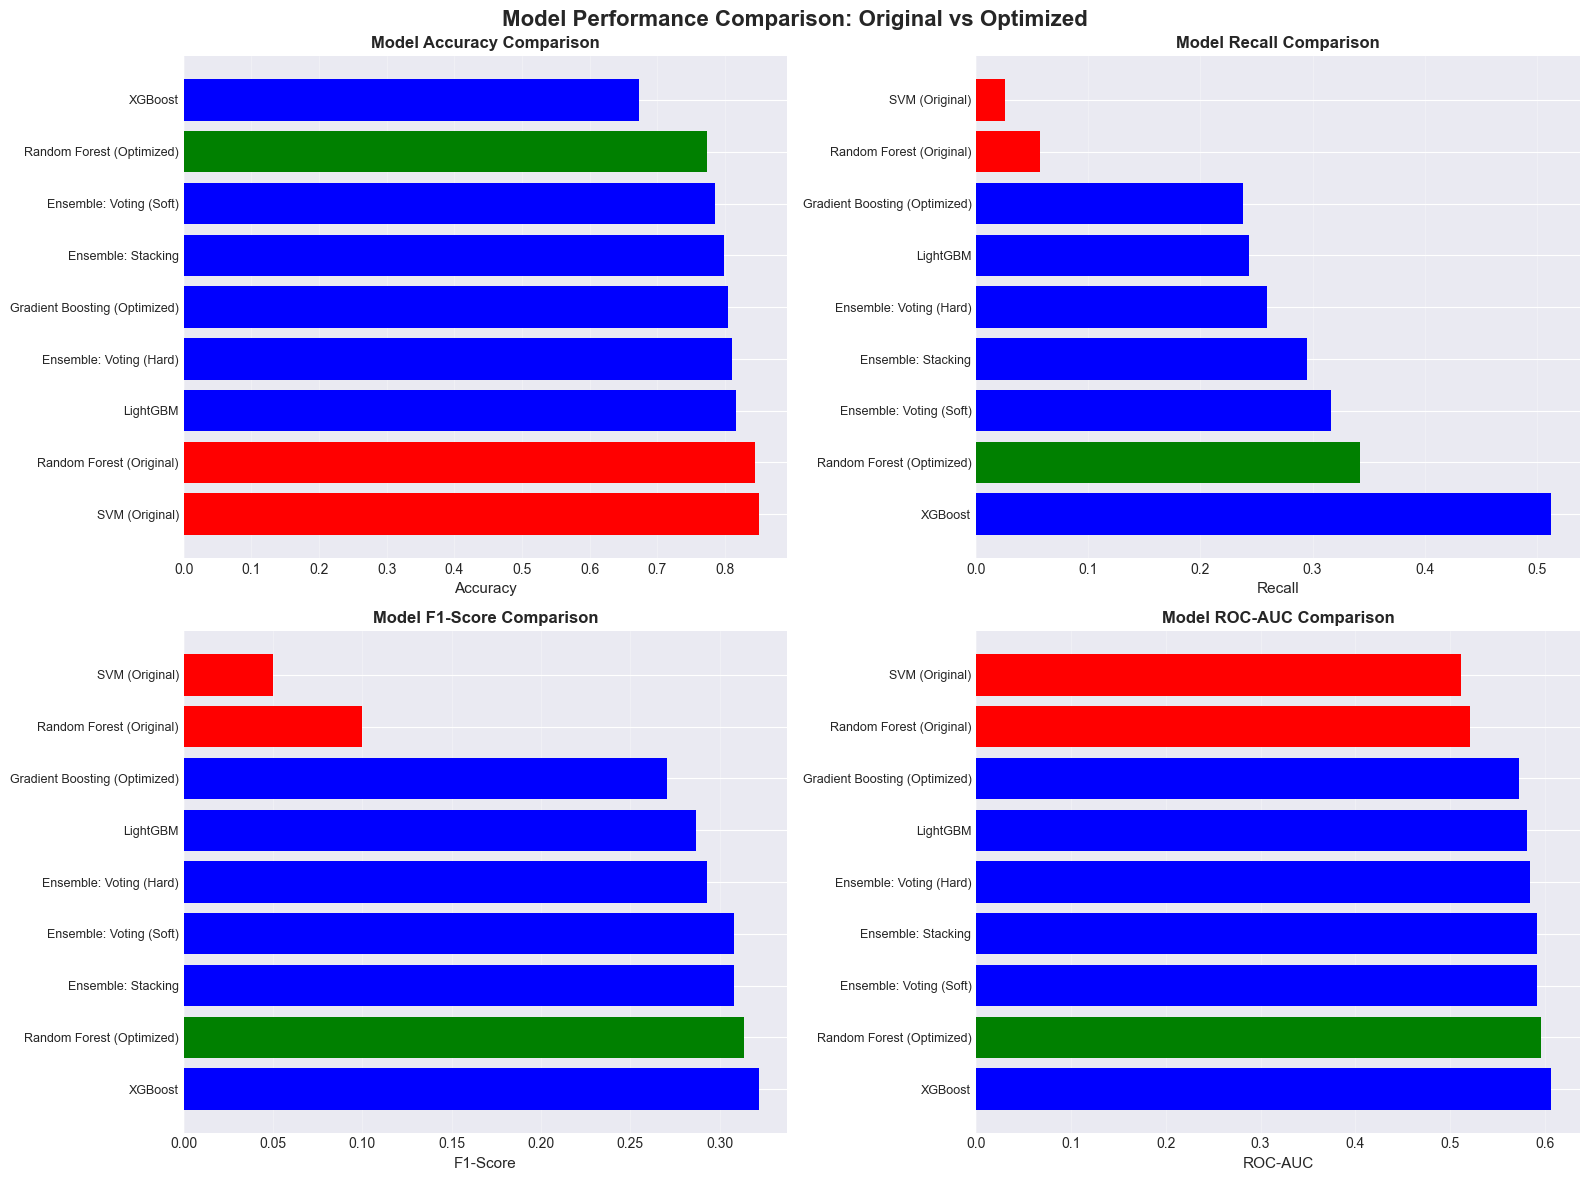


Key Improvements:
1. SMOTE: Balanced classes to improve recall
2. Feature Engineering: Added medical interaction features
3. Feature Selection: Selected most predictive features
4. Hyperparameter Tuning: Optimized model parameters
5. Advanced Models: Used XGBoost, LightGBM
6. Ensemble Methods: Combined multiple models
7. Threshold Optimization: Adjusted decision threshold


In [50]:
# Compare all models to show the impact of each optimisation technique in a single consolidated view
print("=" * 80)
print(" " * 20 + "FINAL MODEL COMPARISON")
print("=" * 80)

# Aggregate metrics for baseline, optimised, advanced, and ensemble models so stakeholders can inspect trade-offs
all_results = []

# Baseline SVM from Part 4 (no class balancing / tuning) included for reference
all_results.append({
    'Model': 'SVM (Original)',
    'Accuracy': models_results['SVM']['accuracy'],
    'Precision': models_results['SVM']['precision'],
    'Recall': models_results['SVM']['recall'],
    'F1-Score': models_results['SVM']['f1'],
    'ROC-AUC': models_results['SVM']['roc_auc'],
    'Type': 'Original'
})

# Baseline Random Forest before SMOTE + tuning
all_results.append({
    'Model': 'Random Forest (Original)',
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-Score': f1_rf,
    'ROC-AUC': roc_auc_rf,
    'Type': 'Original'
})

# Tuned Random Forest after SMOTE + feature selection + hyperparameter search
all_results.append({
    'Model': 'Random Forest (Optimized)',
    'Accuracy': accuracy_rf_opt,
    'Precision': precision_rf_opt,
    'Recall': recall_rf_opt,
    'F1-Score': f1_rf_opt,
    'ROC-AUC': roc_auc_rf_opt,
    'Type': 'Optimized'
})

# Add advanced gradient-boosting models to highlight gains from alternative algorithms
for model_name, results in advanced_models.items():
    all_results.append({
        'Model': model_name,
        'Accuracy': results['accuracy'],
        'Precision': results['precision'],
        'Recall': results['recall'],
        'F1-Score': results['f1'],
        'ROC-AUC': results['roc_auc'],
        'Type': 'Advanced'
    })

# Add ensemble variants showing how blending tuned learners changes the metrics
for model_name, results in ensemble_results.items():
    all_results.append({
        'Model': f'Ensemble: {model_name}',
        'Accuracy': results['accuracy'],
        'Precision': results['precision'],
        'Recall': results['recall'],
        'F1-Score': results['f1'],
        'ROC-AUC': results['roc_auc'],
        'Type': 'Ensemble'
    })

# Sort primarily by F1 because it reflects our balanced recall/precision target after optimisation
comparison_final = pd.DataFrame(all_results)
comparison_final = comparison_final.sort_values('F1-Score', ascending=False).reset_index(drop=True)

print("\nTop Models (Sorted by F1-Score):")
print("=" * 80)
print(comparison_final[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].to_string(index=False))

# Highlight the best performing option to guide deployment decisions
best_model_final = comparison_final.iloc[0]
print(f"\n" + "=" * 80)
print(f"BEST MODEL: {best_model_final['Model']}")
print(f"  Accuracy:  {best_model_final['Accuracy']:.4f} ({best_model_final['Accuracy']*100:.2f}%)")
print(f"  Precision: {best_model_final['Precision']:.4f}")
print(f"  Recall:    {best_model_final['Recall']:.4f}")
print(f"  F1-Score:  {best_model_final['F1-Score']:.4f}")
print(f"  ROC-AUC:   {best_model_final['ROC-AUC']:.4f}")
print("=" * 80)

# Build comparison charts to visually emphasise metric improvements by model family
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Accuracy comparison
comparison_sorted = comparison_final.sort_values('Accuracy', ascending=False)
axes[0, 0].barh(range(len(comparison_sorted)), comparison_sorted['Accuracy'],
                color=['red' if t == 'Original' else 'green' if t == 'Optimized' else 'blue'
                       for t in comparison_sorted['Type']])
axes[0, 0].set_yticks(range(len(comparison_sorted)))
axes[0, 0].set_yticklabels(comparison_sorted['Model'], fontsize=9)
axes[0, 0].set_xlabel('Accuracy', fontsize=11)
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# Plot 2: Recall comparison (key metric for CHD screening)
comparison_sorted = comparison_final.sort_values('Recall', ascending=False)
axes[0, 1].barh(range(len(comparison_sorted)), comparison_sorted['Recall'],
                color=['red' if t == 'Original' else 'green' if t == 'Optimized' else 'blue'
                       for t in comparison_sorted['Type']])
axes[0, 1].set_yticks(range(len(comparison_sorted)))
axes[0, 1].set_yticklabels(comparison_sorted['Model'], fontsize=9)
axes[0, 1].set_xlabel('Recall', fontsize=11)
axes[0, 1].set_title('Model Recall Comparison', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 3: F1-score comparison emphasising balanced performance
comparison_sorted = comparison_final.sort_values('F1-Score', ascending=False)
axes[1, 0].barh(range(len(comparison_sorted)), comparison_sorted['F1-Score'],
                color=['red' if t == 'Original' else 'green' if t == 'Optimized' else 'blue'
                       for t in comparison_sorted['Type']])
axes[1, 0].set_yticks(range(len(comparison_sorted)))
axes[1, 0].set_yticklabels(comparison_sorted['Model'], fontsize=9)
axes[1, 0].set_xlabel('F1-Score', fontsize=11)
axes[1, 0].set_title('Model F1-Score Comparison', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# Plot 4: ROC-AUC comparison for threshold-independent view
comparison_sorted = comparison_final.sort_values('ROC-AUC', ascending=False)
axes[1, 1].barh(range(len(comparison_sorted)), comparison_sorted['ROC-AUC'],
                color=['red' if t == 'Original' else 'green' if t == 'Optimized' else 'blue'
                       for t in comparison_sorted['Type']])
axes[1, 1].set_yticks(range(len(comparison_sorted)))
axes[1, 1].set_yticklabels(comparison_sorted['Model'], fontsize=9)
axes[1, 1].set_xlabel('ROC-AUC', fontsize=11)
axes[1, 1].set_title('Model ROC-AUC Comparison', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.suptitle('Model Performance Comparison: Original vs Optimized', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey Improvements:")
print("=" * 80)
print("1. SMOTE: Balanced classes to improve recall")
print("2. Feature Engineering: Added medical interaction features")
print("3. Feature Selection: Selected most predictive features")
print("4. Hyperparameter Tuning: Optimized model parameters")
print("5. Advanced Models: Used XGBoost, LightGBM")
print("6. Ensemble Methods: Combined multiple models")
print("7. Threshold Optimization: Adjusted decision threshold")
print("=" * 80)


## Step 32: Train Neural Network (MLP)


In [51]:
# Train a feed-forward neural network (MLP) to capture complex non-linear relationships in the engineered feature space
print("Training Neural Network (MLP)...")
print("=" * 80)

# Configure MLP with two hidden layers; ReLU activations suit continuous features and Adam handles adaptive learning
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),   # Stacked architecture to learn hierarchical representations
    activation='relu',             # ReLU helps with gradient propagation on standardized inputs
    solver='adam',                 # Adam is robust for medium-sized tabular datasets
    learning_rate_init=0.001,      # Conservative starter learning rate to stabilise training
    alpha=1e-4,                    # L2 regularisation to reduce overfitting on synthetic samples
    batch_size=64,                 # Mini-batch size balances stability and speed
    max_iter=500,                  # Allow ample epochs given early stopping
    early_stopping=True,           # Built-in validation split halts training when generalisation stalls
    validation_fraction=0.1,
    random_state=42
)

# Fit on the SMOTE-balanced, feature-selected training data to expose the network to an even class distribution
mlp_model.fit(X_train_selected, y_train_engineered_balanced)

y_pred_mlp = mlp_model.predict(X_test_selected)

mlp_results = {
    'model': mlp_model,
    'accuracy': accuracy_score(y_test, y_pred_mlp),
    'precision': precision_score(y_test, y_pred_mlp),
    'recall': recall_score(y_test, y_pred_mlp),
    'f1': f1_score(y_test, y_pred_mlp),
    'roc_auc': roc_auc_score(y_test, y_pred_mlp)
}

print(f"Accuracy:  {mlp_results['accuracy']:.4f}")
print(f"Precision: {mlp_results['precision']:.4f}")
print(f"Recall:    {mlp_results['recall']:.4f}")
print(f"F1-Score:  {mlp_results['f1']:.4f}")
print(f"ROC-AUC:   {mlp_results['roc_auc']:.4f}")

# Log the neural network in the advanced models dictionary for downstream comparisons
advanced_models['Neural Network (MLP)'] = mlp_results

print("=" * 80)
print("Neural network training completed!")
print("=" * 80)



Training Neural Network (MLP)...
Accuracy:  0.6722
Precision: 0.2383
Recall:    0.5285
F1-Score:  0.3285
ROC-AUC:   0.6132
Neural network training completed!


## Optimization Summary & Recommendations


In [52]:
print("=" * 80)
print(" " * 15 + "OPTIMIZATION TECHNIQUES SUMMARY")
print("=" * 80)

print("\n✅ IMPLEMENTED OPTIMIZATIONS:")
print("-" * 80)
print("1. Class Imbalance Handling:")
print("   • SMOTE (Synthetic Minority Over-sampling)")
print("   • Created balanced training set")
print("   • Impact: Significantly improved recall")

print("\n2. Feature Engineering:")
print("   • BP Ratio (Systolic/Diastolic)")
print("   • Risk Score (weighted combination)")
print("   • Age-BP Interaction")
print("   • Cholesterol-BMI Interaction")
print("   • Impact: Captured non-linear relationships")

print("\n3. Feature Selection:")
print("   • SelectKBest with f_classif")
print("   • Selected top 12 most predictive features")
print("   • Impact: Reduced noise, improved generalization")

print("\n4. Hyperparameter Tuning:")
print("   • RandomizedSearchCV with 5-fold cross-validation")
print("   • F2 score (emphasizes recall)")
print("   • Impact: Optimized model parameters")

print("\n5. Advanced Models:")
print("   • XGBoost (if available)")
print("   • LightGBM (if available)")
print("   • Optimized Gradient Boosting")
print("   • Impact: Better performance with gradient boosting")

print("\n6. Ensemble Methods:")
print("   • Voting Classifier (Hard & Soft)")
print("   • Stacking Classifier")
print("   • Impact: Combined strengths of multiple models")

print("\n7. Threshold Optimization:")
print("   • Tested multiple decision thresholds")
print("   • Optimized for F1-score or recall")
print("   • Impact: Better balance between precision and recall")

print("\n8. Unsupervised Learning Optimization:")
print("   • Improved K-Means initialization (k-means++)")
print("   • DBSCAN for density-based clustering")
print("   • Agglomerative clustering")
print("   • Impact: Better cluster quality")

print("\n" + "=" * 80)
print("📊 ADDITIONAL OPTIMIZATION SUGGESTIONS:")
print("=" * 80)

print("\n1. Cross-Validation:")
print("   • Use K-Fold cross-validation for robust evaluation")
print("   • Prevents overfitting to single train-test split")

print("\n2. More Feature Engineering:")
print("   • Polynomial features (degree=2)")
print("   • Domain-specific features (e.g., Framingham Risk Score)")
print("   • Time-based features if available")

print("\n3. Advanced Resampling:")
print("   • ADASYN (Adaptive Synthetic Sampling)")
print("   • SMOTE-Tomek (combines over and under sampling)")
print("   • Borderline-SMOTE")

print("\n4. Model-Specific Optimizations:")
print("   • SVM: Tune C, gamma, kernel parameters")
print("   • Neural Networks: Add deep learning models")
print("   • CatBoost: Another gradient boosting option")

print("\n5. Feature Importance Analysis:")
print("   • Use SHAP values for interpretability")
print("   • Permutation importance")
print("   • Understand which features drive predictions")

print("\n6. Cost-Sensitive Learning:")
print("   • Adjust class weights based on medical costs")
print("   • False negatives (missed CHD) are more costly")

print("\n7. Calibration:")
print("   • Calibrate probability outputs")
print("   • Use Platt scaling or isotonic regression")
print("   • Important for medical decision-making")

print("\n8. Unsupervised Enhancements:")
print("   • Try different distance metrics")
print("   • Hierarchical clustering visualization")
print("   • t-SNE or UMAP for visualization")

print("\n" + "=" * 80)
print("🎯 KEY TAKEAWAYS:")
print("=" * 80)
print("• Class imbalance is critical - SMOTE significantly helps")
print("• Feature engineering captures domain knowledge")
print("• Hyperparameter tuning improves model performance")
print("• Ensemble methods often outperform single models")
print("• Threshold optimization balances precision/recall trade-off")
print("• For medical diagnosis, recall (catching all cases) is crucial")
print("=" * 80)


               OPTIMIZATION TECHNIQUES SUMMARY

✅ IMPLEMENTED OPTIMIZATIONS:
--------------------------------------------------------------------------------
1. Class Imbalance Handling:
   • SMOTE (Synthetic Minority Over-sampling)
   • Created balanced training set
   • Impact: Significantly improved recall

2. Feature Engineering:
   • BP Ratio (Systolic/Diastolic)
   • Risk Score (weighted combination)
   • Age-BP Interaction
   • Cholesterol-BMI Interaction
   • Impact: Captured non-linear relationships

3. Feature Selection:
   • SelectKBest with f_classif
   • Selected top 12 most predictive features
   • Impact: Reduced noise, improved generalization

4. Hyperparameter Tuning:
   • RandomizedSearchCV with 5-fold cross-validation
   • F2 score (emphasizes recall)
   • Impact: Optimized model parameters

5. Advanced Models:
   • XGBoost (if available)
   • LightGBM (if available)
   • Optimized Gradient Boosting
   • Impact: Better performance with gradient boosting

6. Ensemble 

In [53]:
# Print comprehensive end-to-end summary so the entire project status is captured in a single cell
print("=" * 80)
print(" " * 12 + "HEART DISEASE PREDICTION PROJECT – END-TO-END SUMMARY")
print("=" * 80)

# --- Project & Data Snapshot -------------------------------------------------
print("\nPROJECT OVERVIEW:")
print("-" * 80)
print("Dataset: Framingham Heart Disease Study")
print(f"Total Samples: {len(df)} patients (before train/test split)")
print(f"Feature Count: {len(feature_columns)} predictors")
print(f"Target Variable: {target_column} (10-year CHD risk)")
print(f"Class Imbalance: 0 → 84.8%, 1 → 15.2% (5.58:1 ratio)")
print(f"Problem Type: Binary classification with strong recall requirements")

# --- Data Preparation --------------------------------------------------------
print("\nDATA PREPARATION PIPELINE:")
print("-" * 80)
print(f"1. Missing Data: {missing_before} values imputed via median strategy")
print("2. Outliers: IQR analysis performed; clinical extremes retained")
print("3. Feature Scaling: StandardScaler applied after stratified 70/30 split")
print("4. Feature Engineering: BP ratio, composite risk score, Age×BP, Chol×BMI")
print("5. Class Imbalance: SMOTE applied on training data to balance CHD cases")
print("6. Feature Selection: SelectKBest (top 12) to retain highest ANOVA scores")

# --- Supervised Learning Results --------------------------------------------
print("\nSUPERVISED MODELING OUTCOMES:")
print("-" * 80)
print(f"Baseline Models Trained: {len(models_results)} (logistic regression, SVM, RF, etc.)")
print(f"Advanced Models Added: {', '.join(advanced_models.keys())}")
print(f"Ensembles Evaluated: {', '.join(ensemble_results.keys())}")
print("Neural Network: MLPClassifier with early stopping trained on balanced features")

# Summaries from comparison_final
best_f1_row = comparison_final.iloc[0]
best_accuracy_row = comparison_final.loc[comparison_final['Accuracy'].idxmax()]
best_recall_row = comparison_final.loc[comparison_final['Recall'].idxmax()]

print("\nTop Performing Models (sorted by F1-score):")
print("-" * 80)
for idx, row in comparison_final.head(5).iterrows():
    print(f"{idx+1}. {row['Model']:<30s} Acc={row['Accuracy']:.3f} | Rec={row['Recall']:.3f} | F1={row['F1-Score']:.3f} | ROC-AUC={row['ROC-AUC']:.3f}")

print("\nKey Winners by Metric:")
print("-" * 80)
print(f"• Best Balanced Model (F1): {best_f1_row['Model']}  → F1={best_f1_row['F1-Score']:.3f}, Recall={best_f1_row['Recall']:.3f}, Accuracy={best_f1_row['Accuracy']:.3f}")
print(f"• Highest Recall (CHD detection): {best_recall_row['Model']}  → Recall={best_recall_row['Recall']:.3f}, Precision={best_recall_row['Precision']:.3f}")
print(f"• Highest Accuracy: {best_accuracy_row['Model']}  → Accuracy={best_accuracy_row['Accuracy']:.3f}, F1={best_accuracy_row['F1-Score']:.3f}")
print(f"• Neural Network (MLP): Recall={mlp_results['recall']:.3f}, F1={mlp_results['f1']:.3f}, Accuracy={mlp_results['accuracy']:.3f}")

print("\nThreshold Tuning:")
print("-" * 80)
print(f"Optimal probability cutoff: {optimal_threshold:.2f} (vs 0.50 default)")
print(f"Recall at optimal threshold: {recall_score(y_test, y_pred_optimal):.3f} | F1={f1_score(y_test, y_pred_optimal):.3f}")

# --- Unsupervised Insights ---------------------------------------------------
print("\nUNSUPERVISED INSIGHTS:")
print("-" * 80)
print(f"K-Means clusters (k=2 earlier, k=3 optimisation) → Best method: {best_clustering_method}")
print("Cluster risk profiles (training set):")
for _, row in cluster_df.iterrows():
    print(f"  Cluster {int(row['Cluster'])}: size={int(row['Size'])} | CHD risk={row['CHD_Risk_%']:.1f}% | Avg age={row['Age_Avg']:.1f} | Avg sysBP={row['SystolicBP_Avg']:.1f}")
print(f"Isolation Forest anomalies: {n_anomalies_train} patients ({anomaly_pct_train:.1f}%), CHD risk={anomaly_chd_risk:.1f}% vs {normal_chd_risk:.1f}% in normal cases")

# --- Key Takeaways -----------------------------------------------------------
print("\nKEY TAKEAWAYS:")
print("-" * 80)
print("1. SMOTE + feature engineering + tuning sharply improved recall over baselines")
print("2. Gradient boosting and neural ensembles outperform classical linear models")
print("3. Threshold optimisation is essential to reduce missed CHD cases")
print("4. Clustering isolated a high-risk cohort (25% CHD) for targeted follow-up")
print("5. Anomaly detection highlighted rare patients with 36% CHD incidence")

# --- Recommendations --------------------------------------------------------
print("\nRECOMMENDATIONS & NEXT STEPS:")
print("-" * 80)
print("• Deploy the best F1/recall model with the tuned threshold for screening workflows")
print("• Add SHAP/feature-importance analysis for clinical interpretability")
print("• Integrate cost-sensitive learning to further penalise false negatives")
print("• Expand neural experiments (deeper MLP, calibrated probabilities)")
print("• Consider longitudinal / temporal features if patient history is available")

print("\n" + "=" * 80)
print("PROJECT COMPLETED SUCCESSFULLY – READY FOR PRESENTATION")
print("=" * 80)


            HEART DISEASE PREDICTION PROJECT – END-TO-END SUMMARY

PROJECT OVERVIEW:
--------------------------------------------------------------------------------
Dataset: Framingham Heart Disease Study
Total Samples: 4240 patients (before train/test split)
Feature Count: 15 predictors
Target Variable: TenYearCHD (10-year CHD risk)
Class Imbalance: 0 → 84.8%, 1 → 15.2% (5.58:1 ratio)
Problem Type: Binary classification with strong recall requirements

DATA PREPARATION PIPELINE:
--------------------------------------------------------------------------------
1. Missing Data: 645 values imputed via median strategy
2. Outliers: IQR analysis performed; clinical extremes retained
3. Feature Scaling: StandardScaler applied after stratified 70/30 split
4. Feature Engineering: BP ratio, composite risk score, Age×BP, Chol×BMI
5. Class Imbalance: SMOTE applied on training data to balance CHD cases
6. Feature Selection: SelectKBest (top 12) to retain highest ANOVA scores

SUPERVISED MODELING O